In [56]:
import sys; sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
import os
from src.simple_utils import load_pickle
from src.data_utils import cifar10_label_names, get_dataset
from os.path import join
from cifarclass import cifar100_classes
import torch

classes=cifar100_classes

In [63]:
name = "CIFAR100_test"
# name of training dataset
train_set = "CIFAR100_train"

print("loading data")
grouped = load_pickle('../processed/cifar100/clip_new/group2.pkl')
scores = load_pickle('../processed/cifar100/clip_new/scores.pkl')
print("done")

print("loading dataset")
dataset = get_dataset('data', name)
ytest = np.array(dataset.targets)
print("done")


loading data
done
loading dataset
Files already downloaded and verified
done


In [3]:
grouped['CIFAR100_test']['ClipViTB32'].keys()

dict_keys(['x', 'x_err', 'points', 'points_err', 'labels', 'labels_err', 'probs', 'freqs', 'x_smooth', 'points_smooth'])

In [83]:
# preprocessing: compute soft-accuracies
def probs_to_softacc(probs):
    return np.array([p[i, yi, :] for i, yi in enumerate(ytest)]).mean(0)

softacc = probs_to_softacc(grouped[name]['ClipViTB32']['probs'])
softacc

array([0.01084949, 0.01244471, 0.0144032 , 0.01669697, 0.0193657 ,
       0.02243982, 0.02595723, 0.02990744, 0.03434641, 0.03931442,
       0.04695878, 0.05258518, 0.05847045, 0.06468074, 0.0710883 ,
       0.07782506, 0.08465525, 0.09174713, 0.09907939, 0.10635133,
       0.11523648, 0.1207576 , 0.12621115, 0.13156681, 0.13685334,
       0.14216956, 0.14753905, 0.15276745, 0.15788014, 0.16295202,
       0.16800012, 0.17076534, 0.17348523, 0.17614302, 0.1787424 ,
       0.18133631, 0.1838719 , 0.18641566, 0.18907605, 0.19164532,
       0.19349599, 0.19416292, 0.19487755, 0.1955575 , 0.19624345,
       0.1968925 , 0.19757326, 0.19895945, 0.19964124], dtype=float32)

In [55]:
grouped['CIFAR100_test']['ClipViTB32']['probs'].shape

(10000, 100, 49)

In [15]:
indices = np.random.default_rng(42).choice(np.arange(10000), size=10)

In [16]:
default_sizes = {"CIFAR100_train": 50000, "CIFAR100_test": 10000}
label_mapping = {0: "apple", 
1: "aquarium_fish", 
2: "baby", 
3: "bear", 
4: "beaver", 
5: "bed", 
6: "bee", 
7: "beetle", 
8: "bicycle", 
9: "bottle", 
10: "bowl", 
11: "boy", 
12: "bridge", 
13: "bus", 
14: "butterfly", 
15: "camel", 
16: "can", 
17: "castle", 
18: "caterpillar", 
19: "cattle", 
20: "chair", 
21: "chimpanzee", 
22: "clock", 
23: "cloud", 
24: "cockroach", 
25: "couch", 
26: "cra", 
27: "crocodile", 
28: "cup", 
29: "dinosaur", 
30: "dolphin", 
31: "elephant", 
32: "flatfish", 
33: "forest", 
34: "fox", 
35: "girl", 
36: "hamster", 
37: "house", 
38: "kangaroo", 
39: "keyboard", 
40: "lamp", 
41: "lawn_mower", 
42: "leopard", 
43: "lion", 
44: "lizard", 
45: "lobster", 
46: "man", 
47: "maple_tree", 
48: "motorcycle", 
49: "mountain", 
50: "mouse", 
51: "mushroom", 
52: "oak_tree", 
53: "orange", 
54: "orchid", 
55: "otter", 
56: "palm_tree", 
57: "pear", 
58: "pickup_truck", 
59: "pine_tree", 
60: "plain", 
61: "plate", 
62: "poppy", 
63: "porcupine", 
64: "possum", 
65: "rabbit", 
66: "raccoon", 
67: "ray", 
68: "road", 
69: "rocket", 
70: "rose", 
71: "sea", 
72: "seal", 
73: "shark", 
74: "shrew", 
75: "skunk", 
76: "skyscraper", 
77: "snail", 
78: "snake", 
79: "spider", 
80: "squirrel", 
81: "streetcar", 
82: "sunflower", 
83: "sweet_pepper", 
84: "table", 
85: "tank", 
86: "telephone", 
87: "television", 
88: "tiger", 
89: "tractor", 
90: "train", 
91: "trout", 
92: "tulip", 
93: "turtle", 
94: "wardrobe", 
95: "whale", 
96: "willow_tree", 
97: "wolf", 
98: "woman", 
99: "worm"}
classes = list(label_mapping.values())

In [17]:
num_figs = 10
alpha =0.2 
markersize=12

index 892


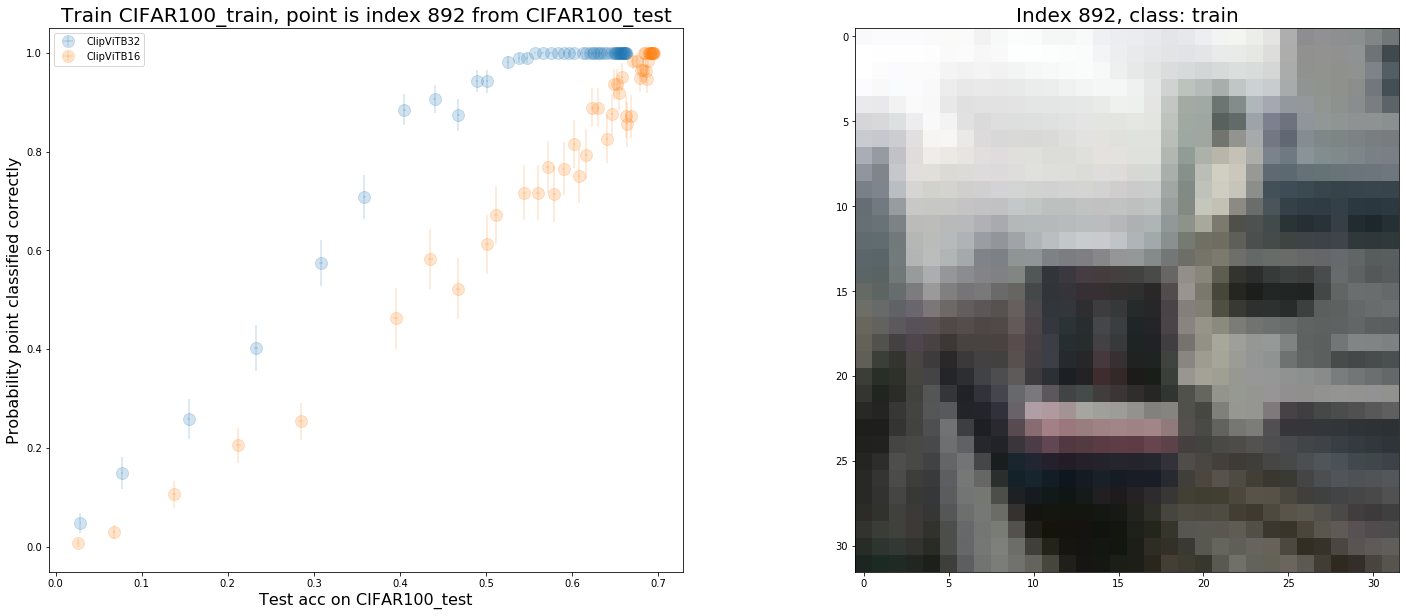

index 7739


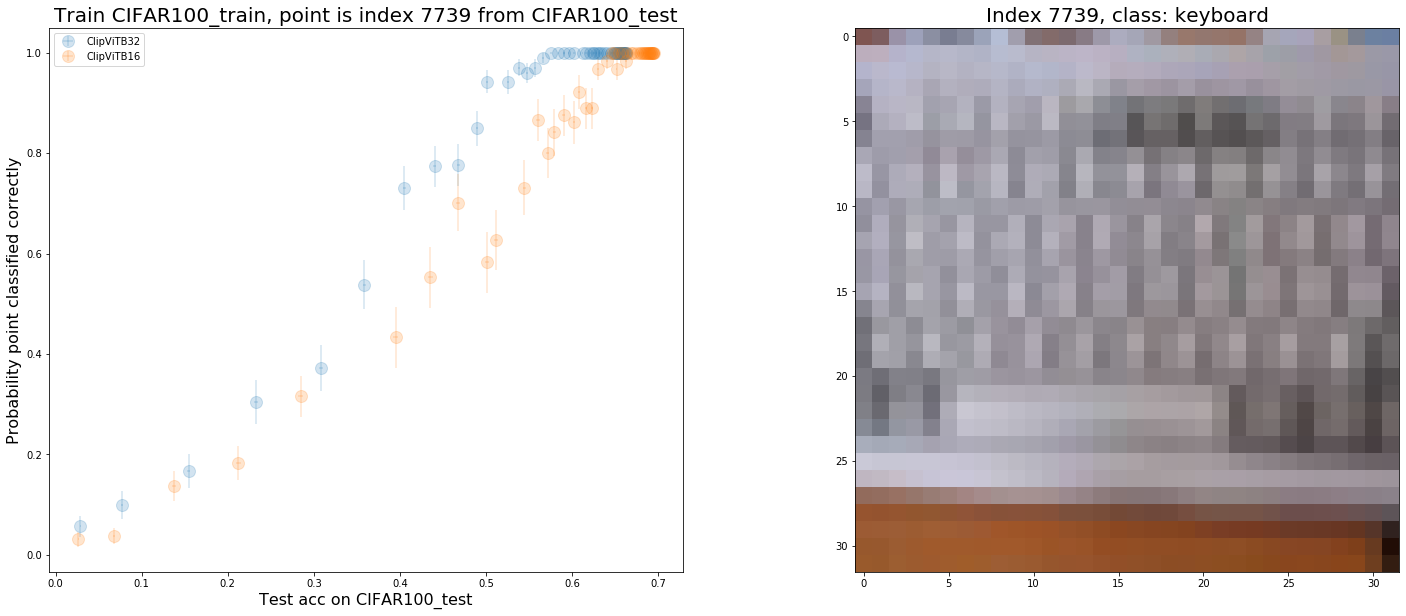

index 6545


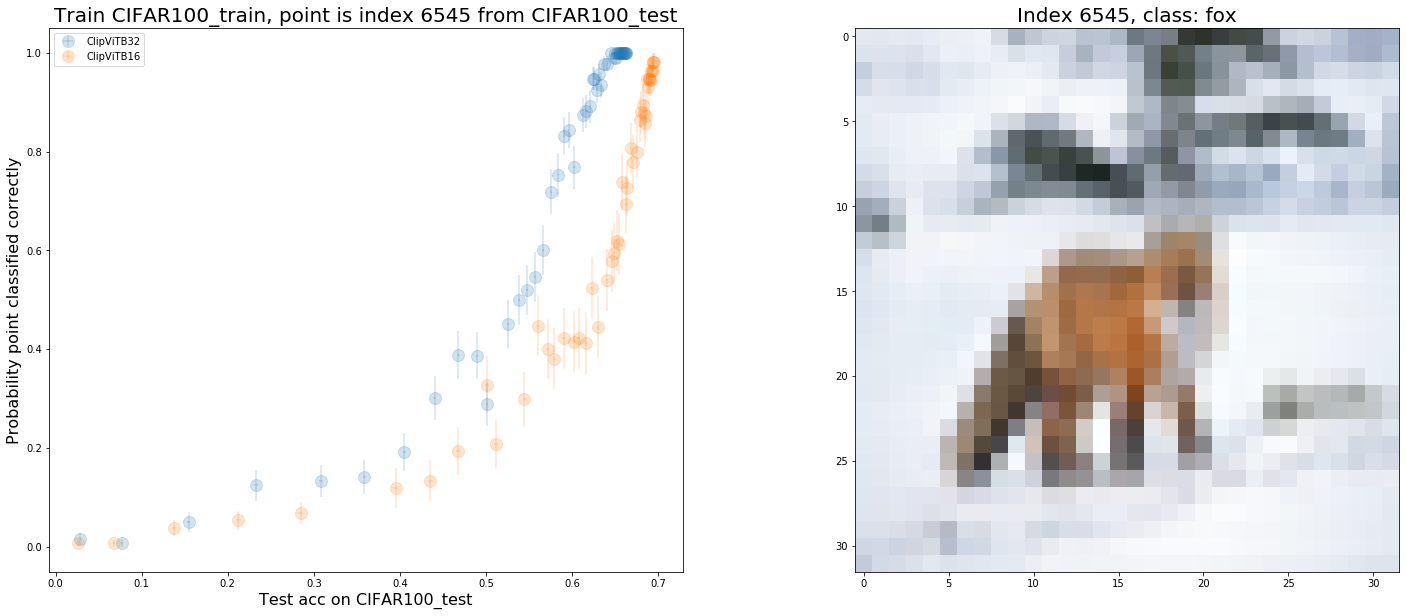

In [35]:
for idx in indices[:3]:
    print("index %d" % idx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
    for plot_group in grouped[name]:
        dct = grouped[name][plot_group]
        ax1.errorbar(
            dct["x"],
            dct["points"][idx],
            yerr=dct["points_err"][idx],
            xerr=dct["x_err"],
            fmt='o',
            alpha=alpha,
            markersize=markersize,
            label=plot_group,
        )

    ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
    ax1.set_ylabel("Probability point classified correctly", fontsize=16)
    ax1.set_title(
        "Train %s, point is index %d from %s" % (train_set, idx, name),
        fontsize=20,
    )

    ax1.legend(loc="best")
    img, label = dataset.__getitem__(idx)
    img = np.array(img)
    ax2.imshow(img, interpolation="nearest")
    ax2.set_title("Index %d, class: %s" % (idx, classes[label]), fontsize=20)
    plt.show()


In [84]:
import seaborn as sns
import colorcet as cc
from ipdb import set_trace

def cut_labels(y, labels, k=8):
    good = np.argpartition(np.sum(y, axis=1), -k)[-k:]
    bad = set(range(100)).difference(set(list(good)))
    for i in bad:
        labels[i] = '_nolegend_'
    return labels

def stackplot(index, types = ["probs","freqs"], plot_group = "ClipViTB32"):
    dct = grouped[name][plot_group]
    print("index %d" % idx)
    img, label = dataset.__getitem__(idx)
    img = np.array(img)
    col = sns.color_palette(cc.glasbey, n_colors=25)

    if "probs" in types:
        print("probs")
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
        y = dct["probs"][idx].copy()
        ind = np.argsort(y[:,-1])[::-1] # sort labels according to their final probabilities
        print(f"Top 5 are {ind[:5]}")
        print(f"Prediction is {classes[ind[0]]}")
        y = y[ind]
        labels = [classes[ind[i]] for i in range(len(classes))]
        new_label = list(ind).index(label)
        labels[0], labels[new_label] = labels[new_label], labels[0]
        y[[0,new_label]] = y[[new_label,0]]
        
        
        ##xx = dct["x"]
        xx = probs_to_softacc(y)
        
        truth = classes[label]
        labels = cut_labels(y, labels)
        labels[0] = truth
        ax1.stackplot(xx, y, labels=labels, colors = col)
        ax1.set_xlabel("Soft-Test acc on %s" % name, fontsize=16)
        ax1.set_ylabel("Softmax probabilities", fontsize=16)
        ax1.set_title(
            "Train %s, architecture %s" % (train_set, plot_group),
            fontsize=20,
        )

        ax1.legend(loc="best")
        ax2.imshow(img, interpolation="nearest")
        ax2.set_title("Index %d from %s, class: %s" % (idx, name, classes[label]), fontsize=20)
        plt.show()

    if "freqs" in types:
        print("freqs")
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))
        y = dct["freqs"][idx]
        y[[0, label]] = y[[label, 0]]
        labels = classes.copy()
        labels[0], labels[label] = labels[label], labels[0]
        labels = cut_labels(y, labels)

        ax1.stackplot(dct["x"], y, labels=labels, colors = col)
        ax1.set_xlabel("Test acc on %s" % name, fontsize=16)
        ax1.set_ylabel("Frequency of predictions", fontsize=16)
        ax1.set_title(
            "Train %s, architecture %s" % (train_set, plot_group),
            fontsize=20,
        )

        ax1.legend(loc="best")
        img, label = dataset.__getitem__(idx)
        img = np.array(img)
        ax2.imshow(img, interpolation="nearest")
        ax2.set_title("Index %d from %s, class: %s" % (idx, name, classes[label]), fontsize=20)
        plt.show()

index 892
probs
Top 5 are [90 81 13 12 68]
Prediction is train


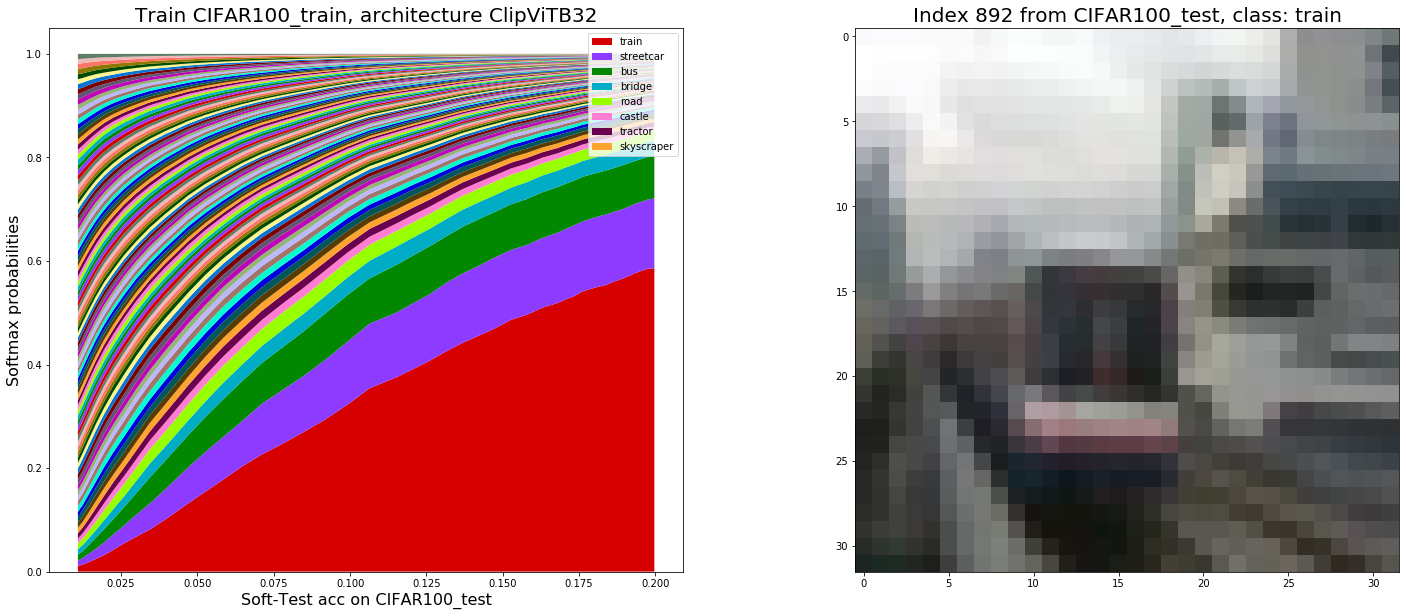

freqs


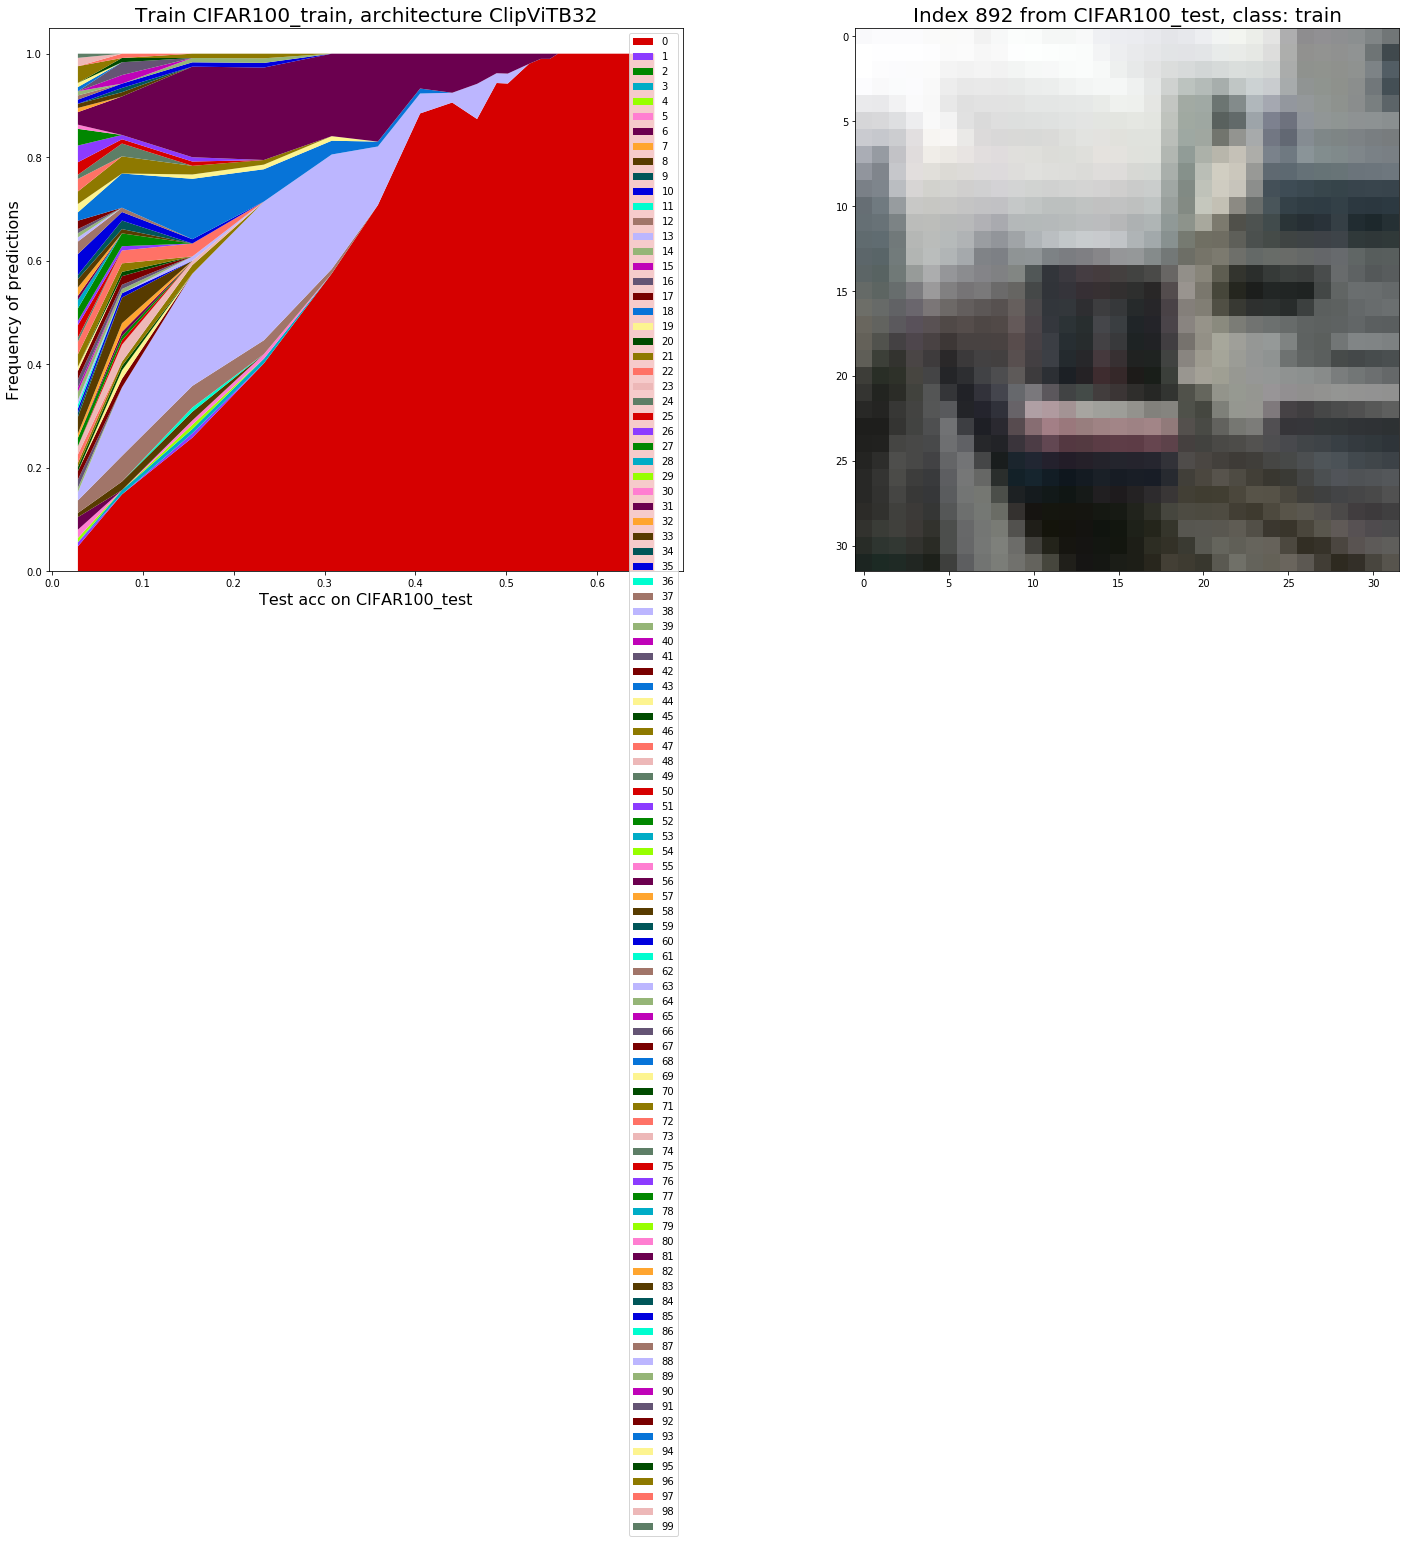

index 7739
probs
Top 5 are [39 87 86 94 16]
Prediction is keyboard


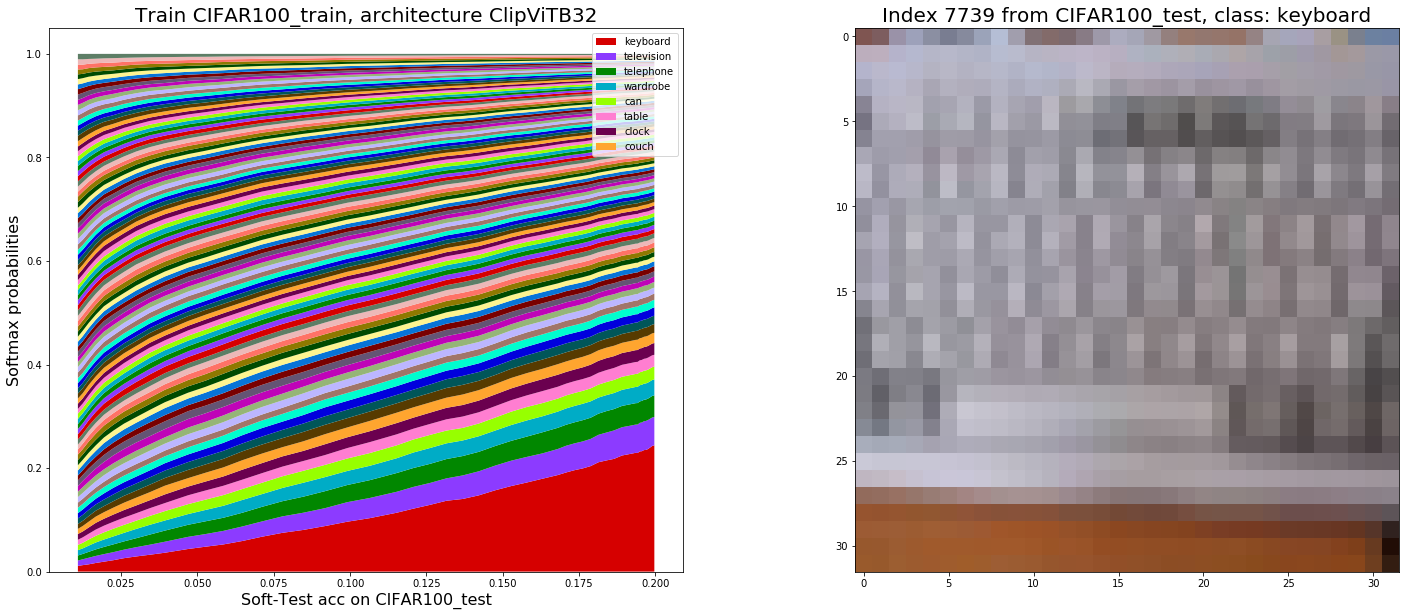

freqs


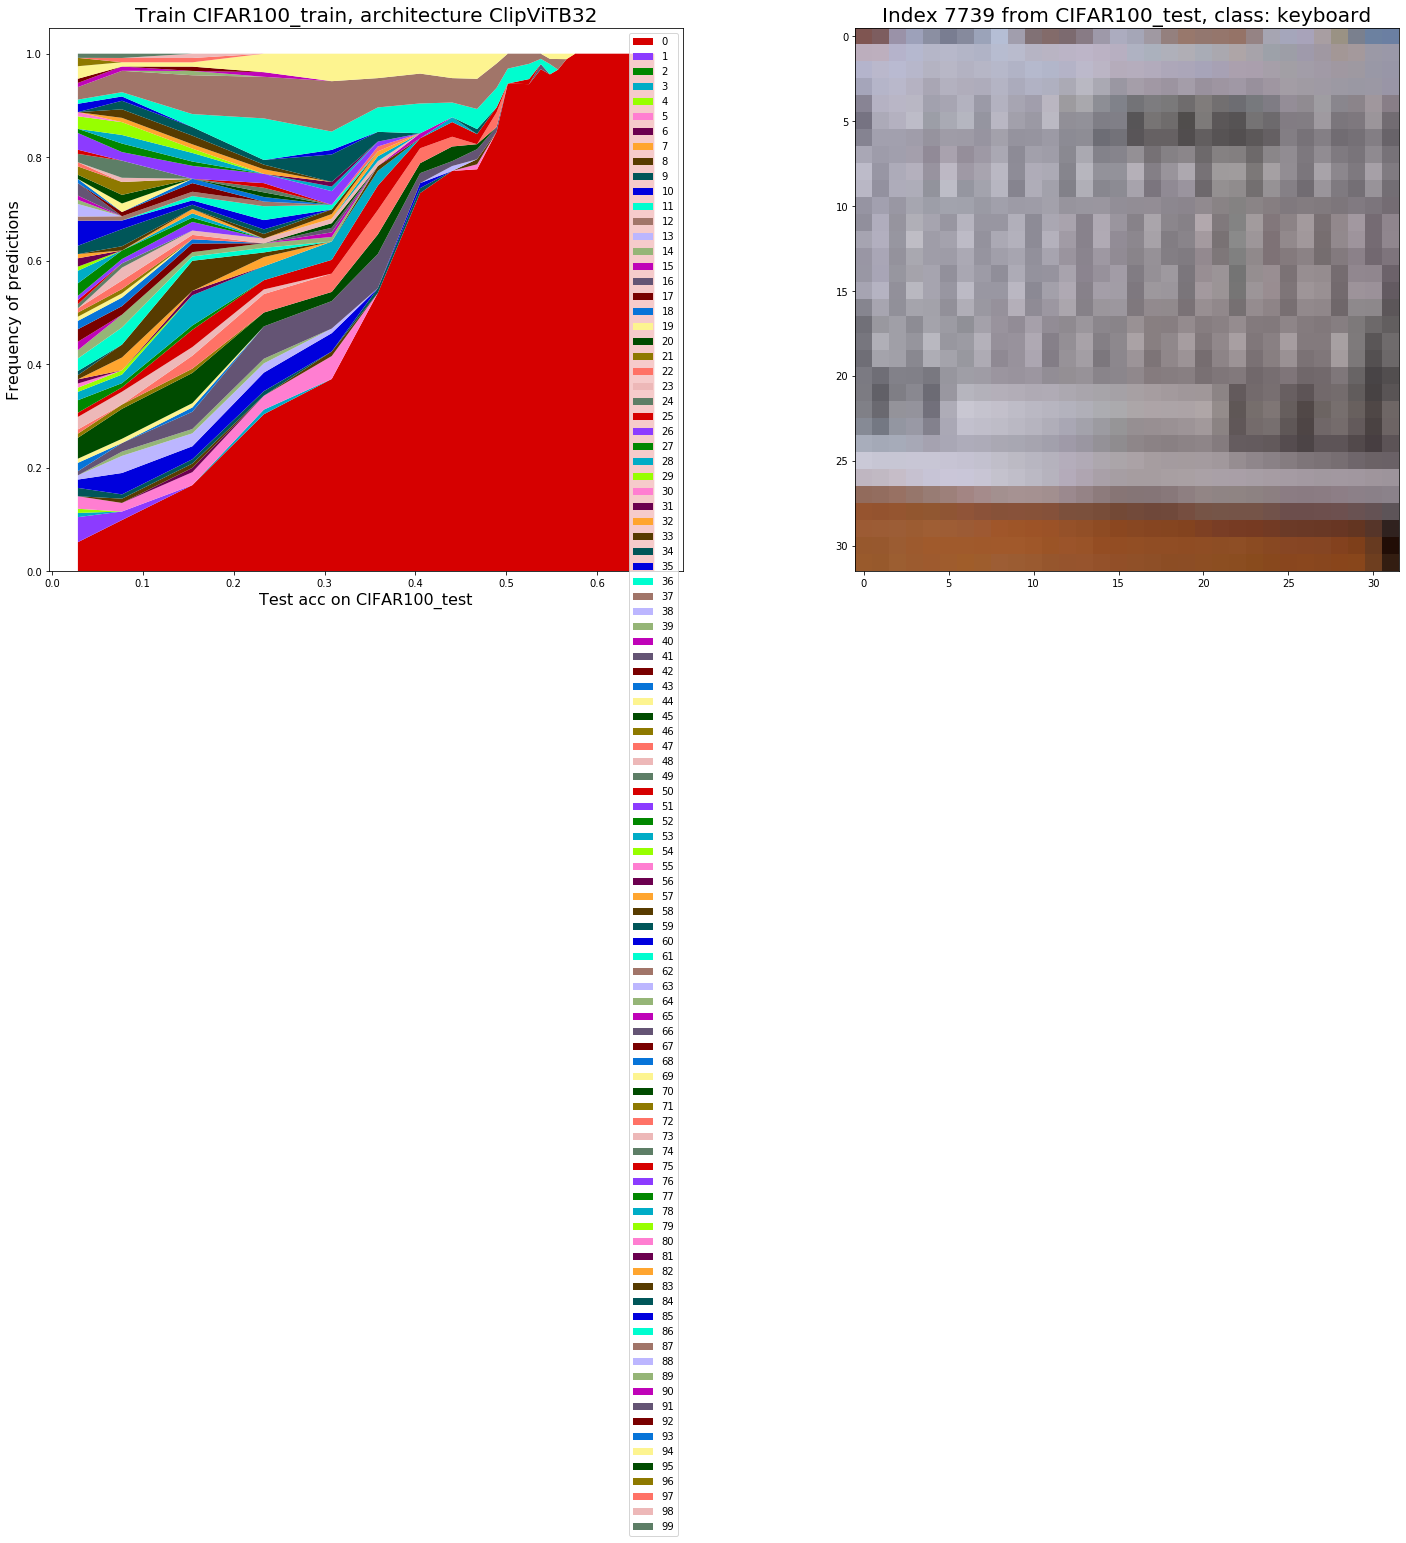

index 6545
probs
Top 5 are [34  3 97 43 88]
Prediction is fox


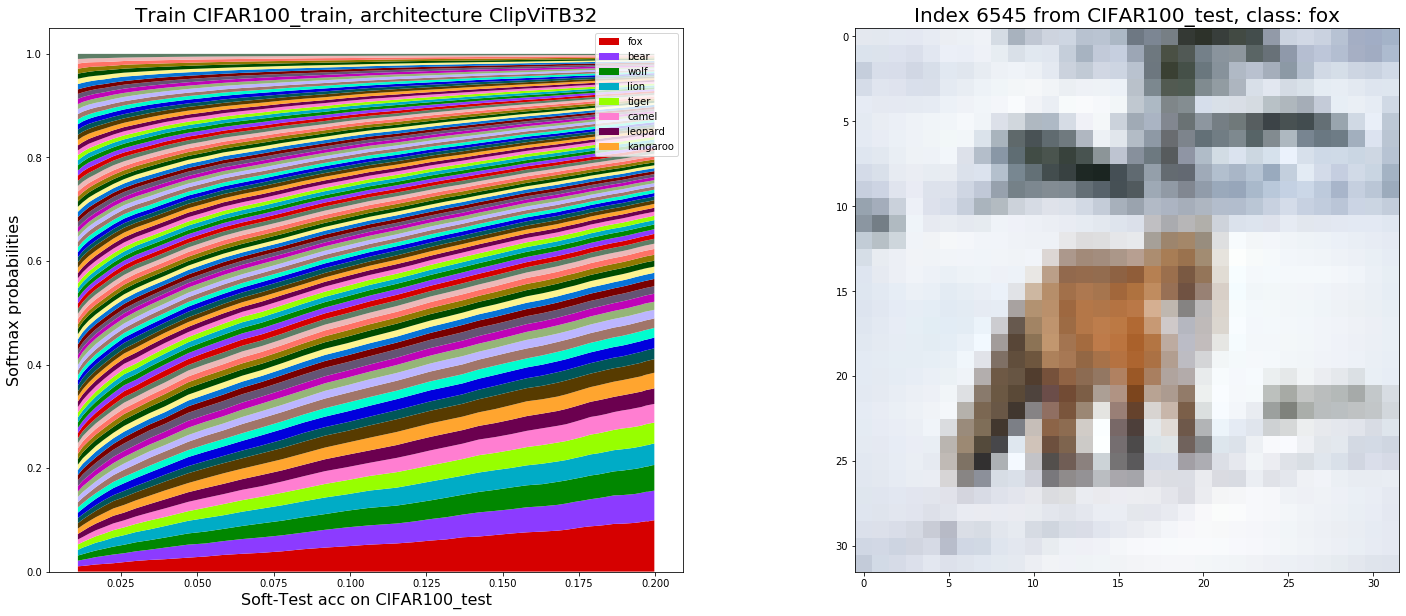

freqs


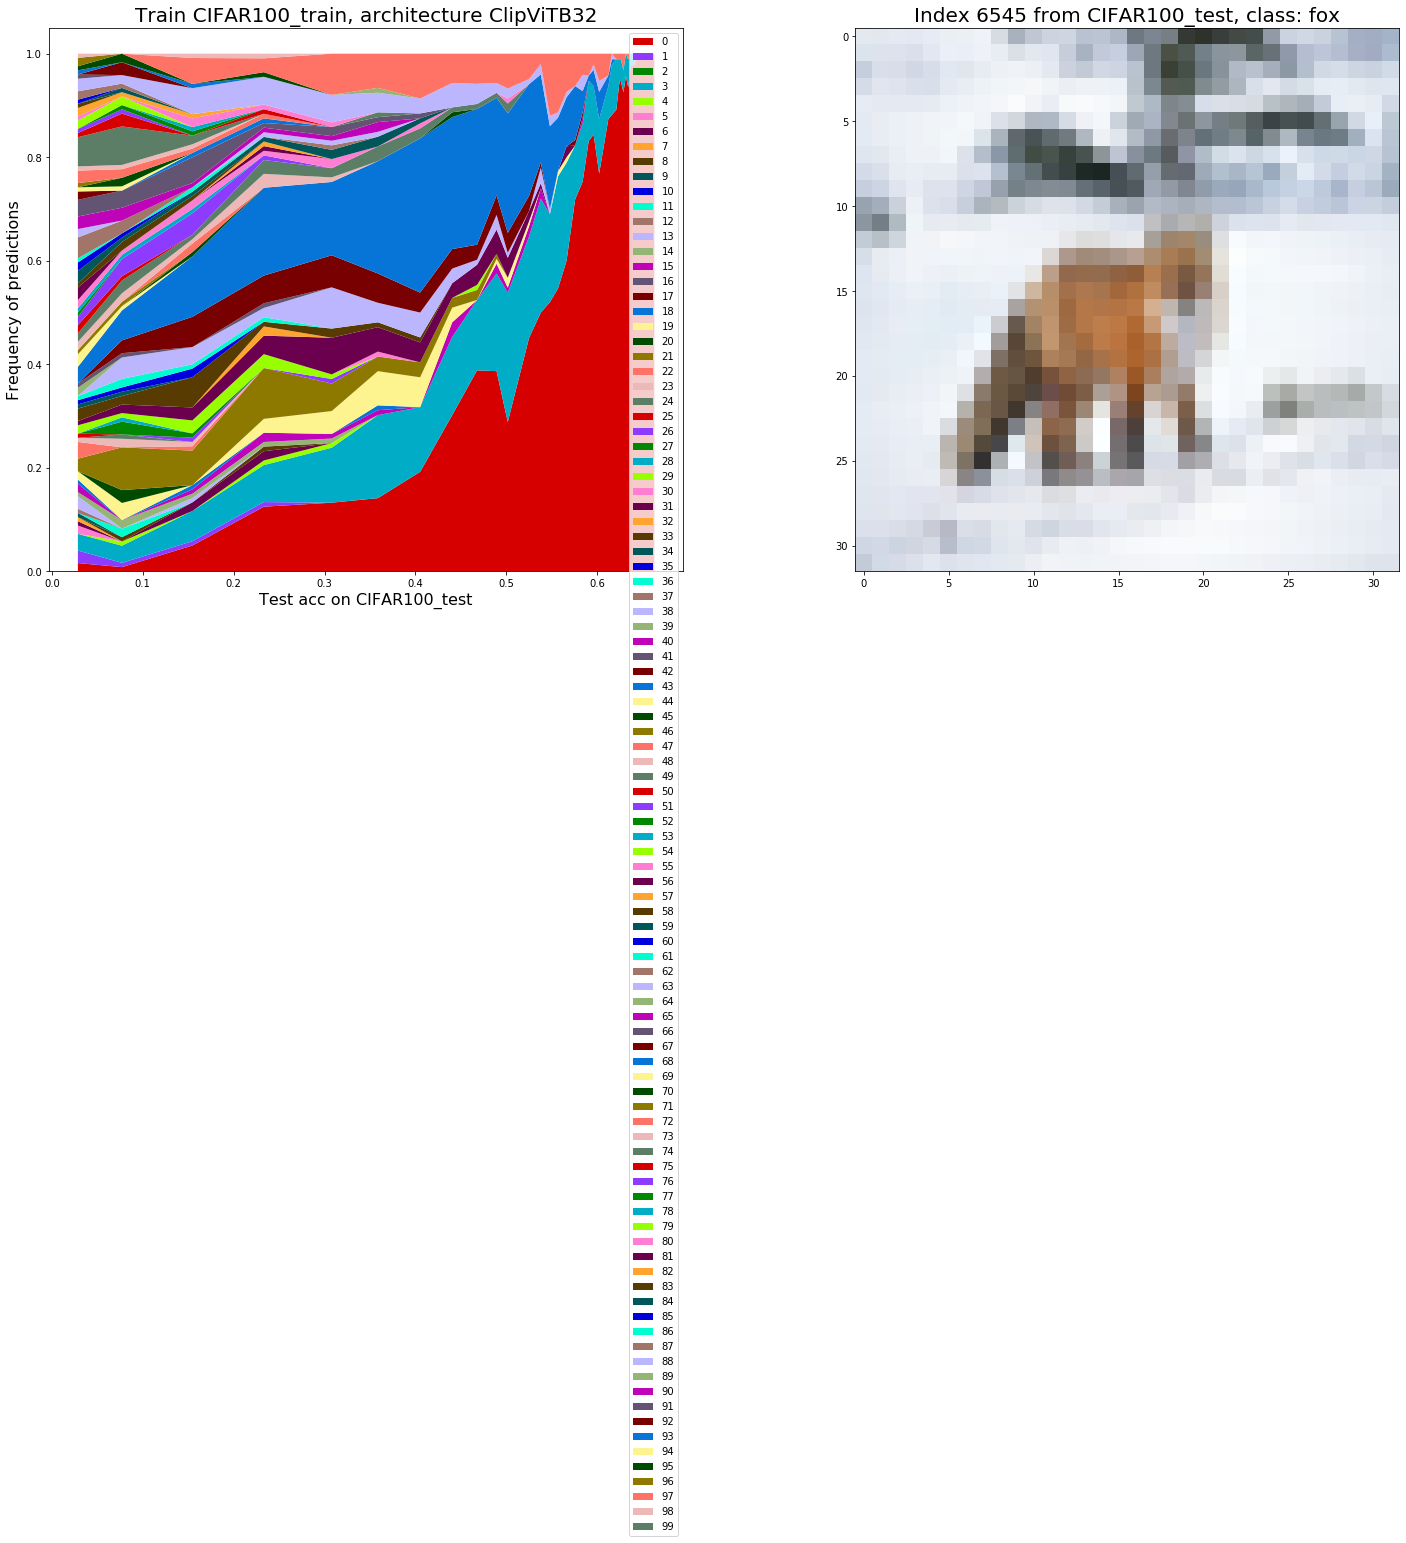

index 4388
probs
Top 5 are [79 24  7 26  6]
Prediction is spider


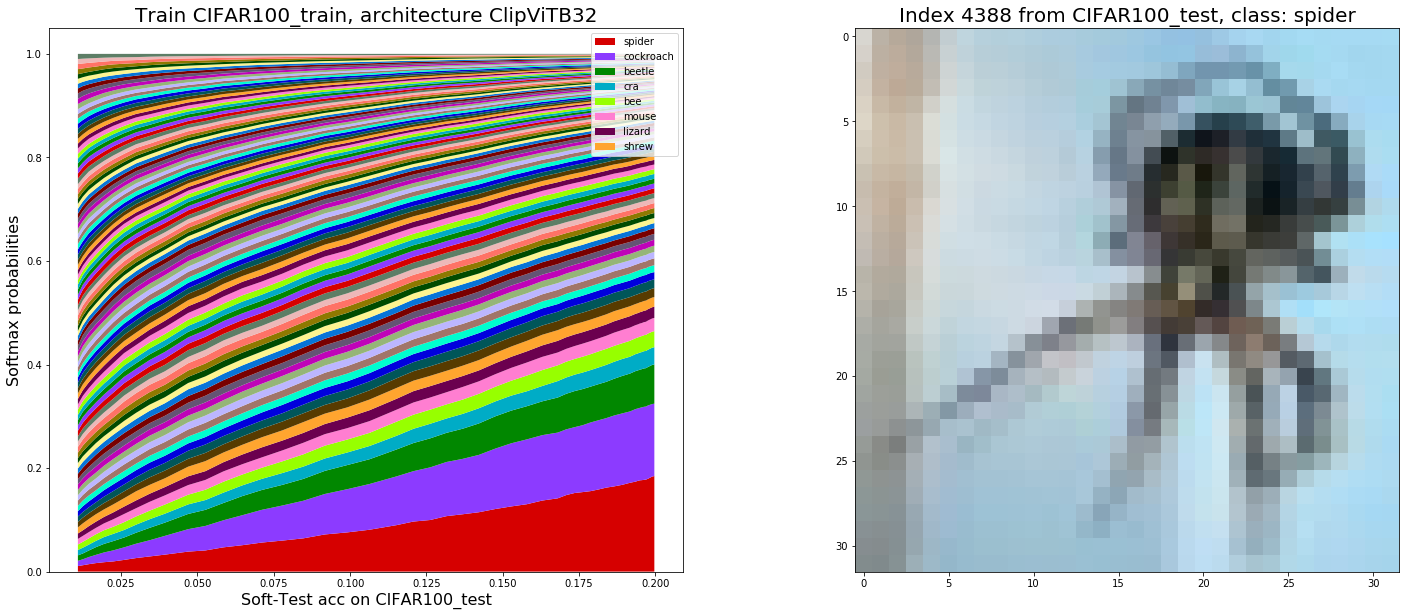

freqs


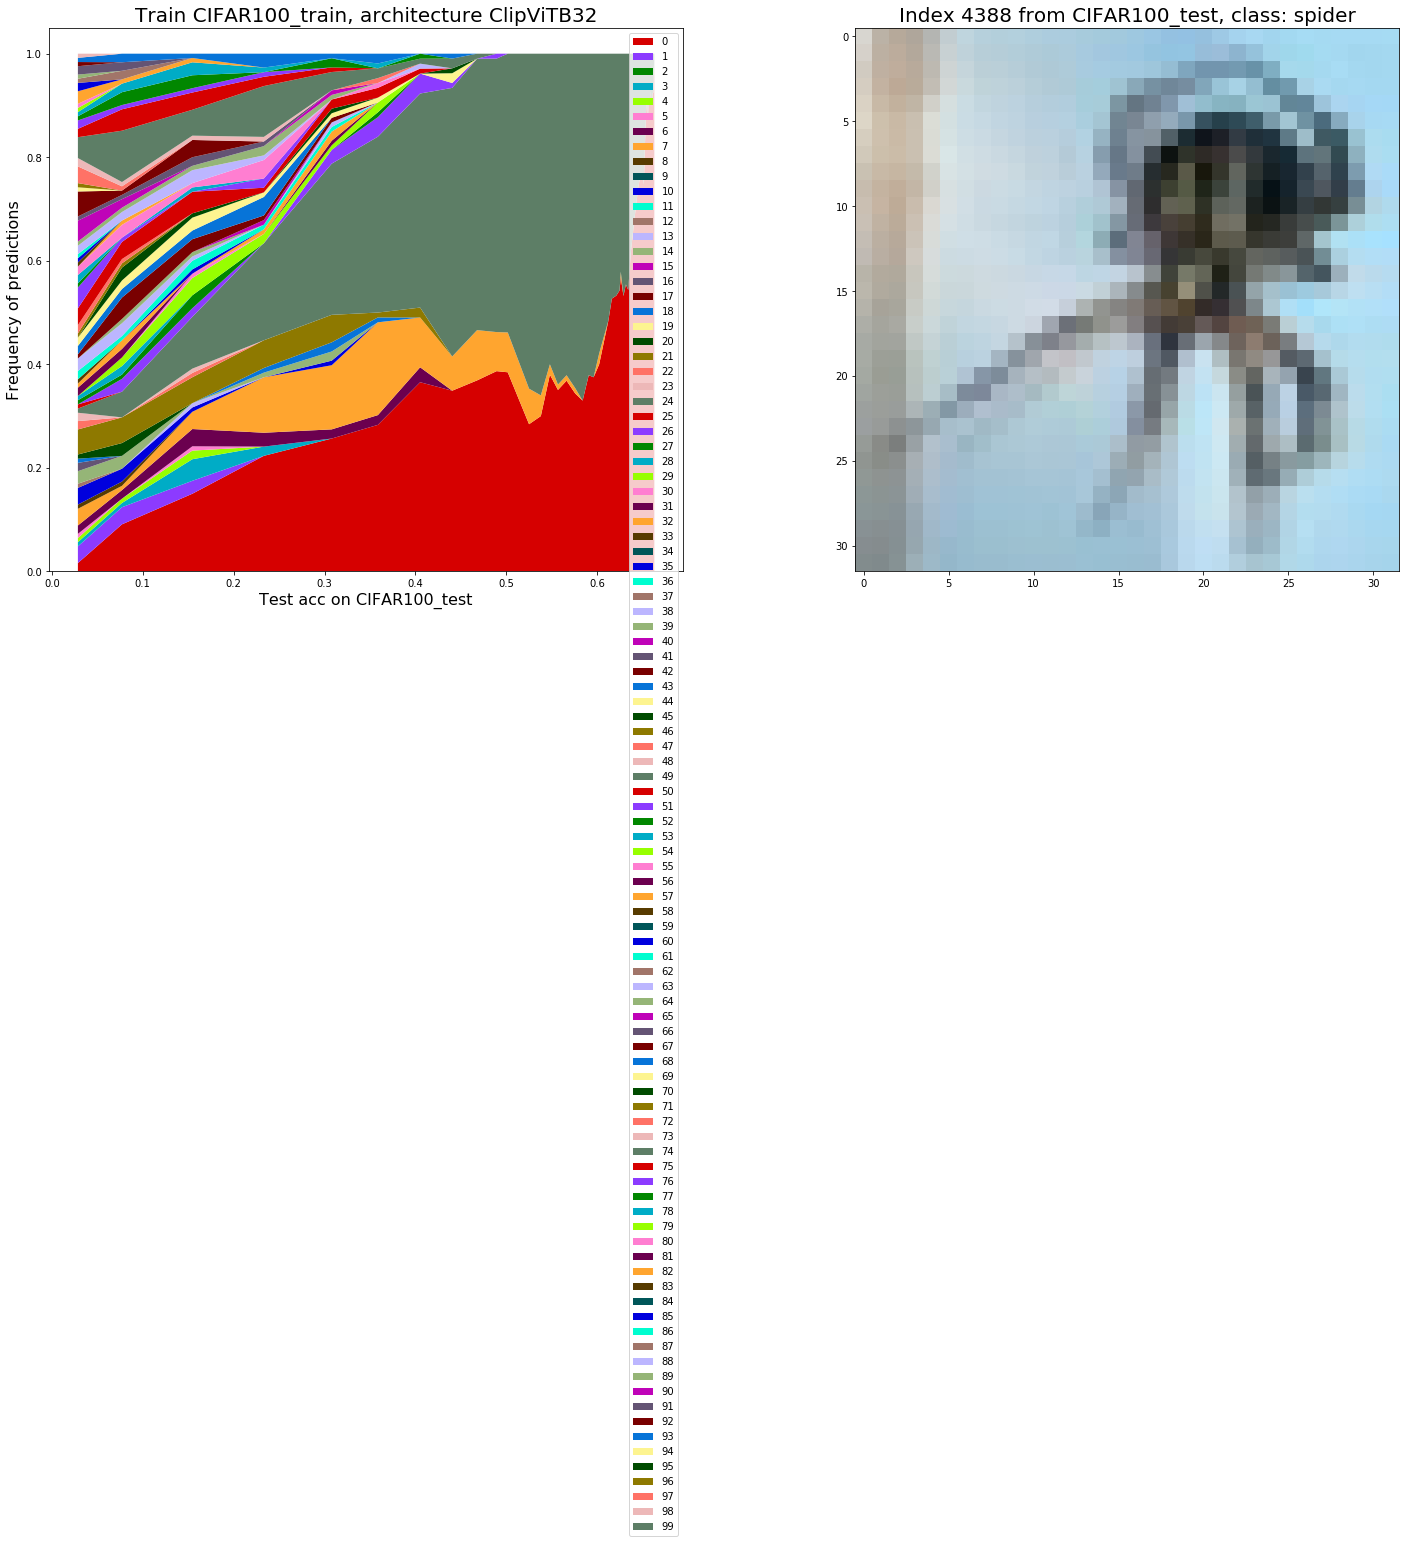

index 4330
probs
Top 5 are [47 52 59 96 33]
Prediction is maple_tree


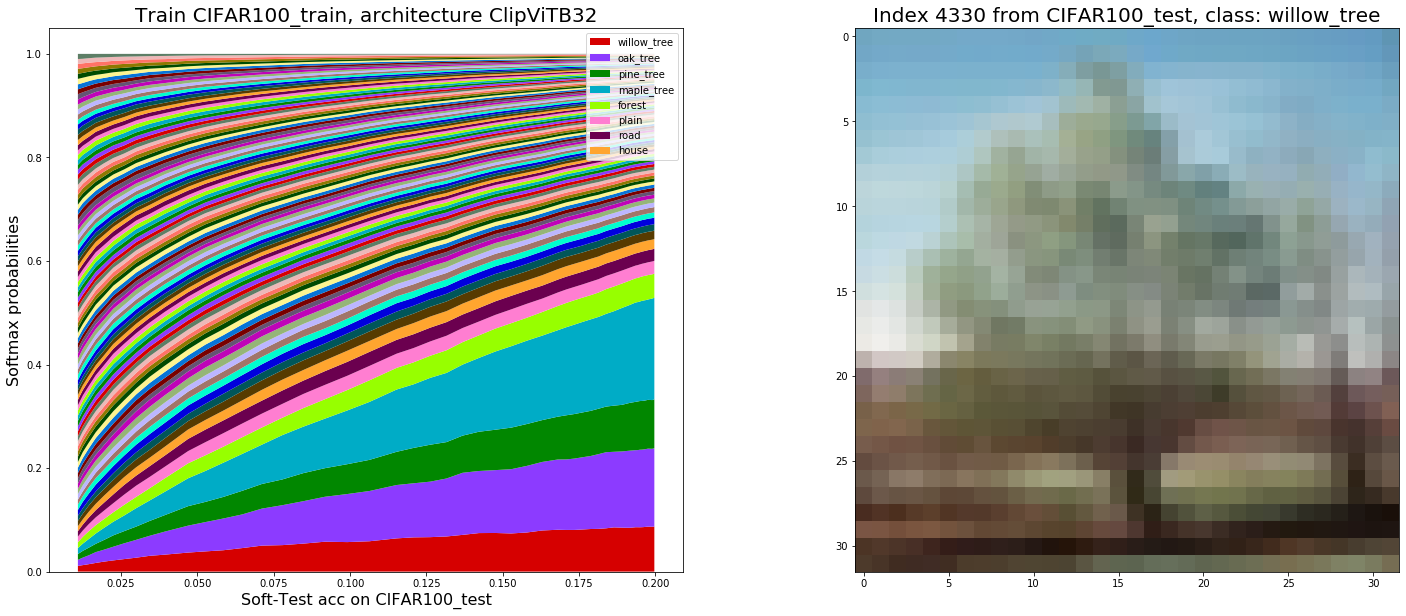

freqs


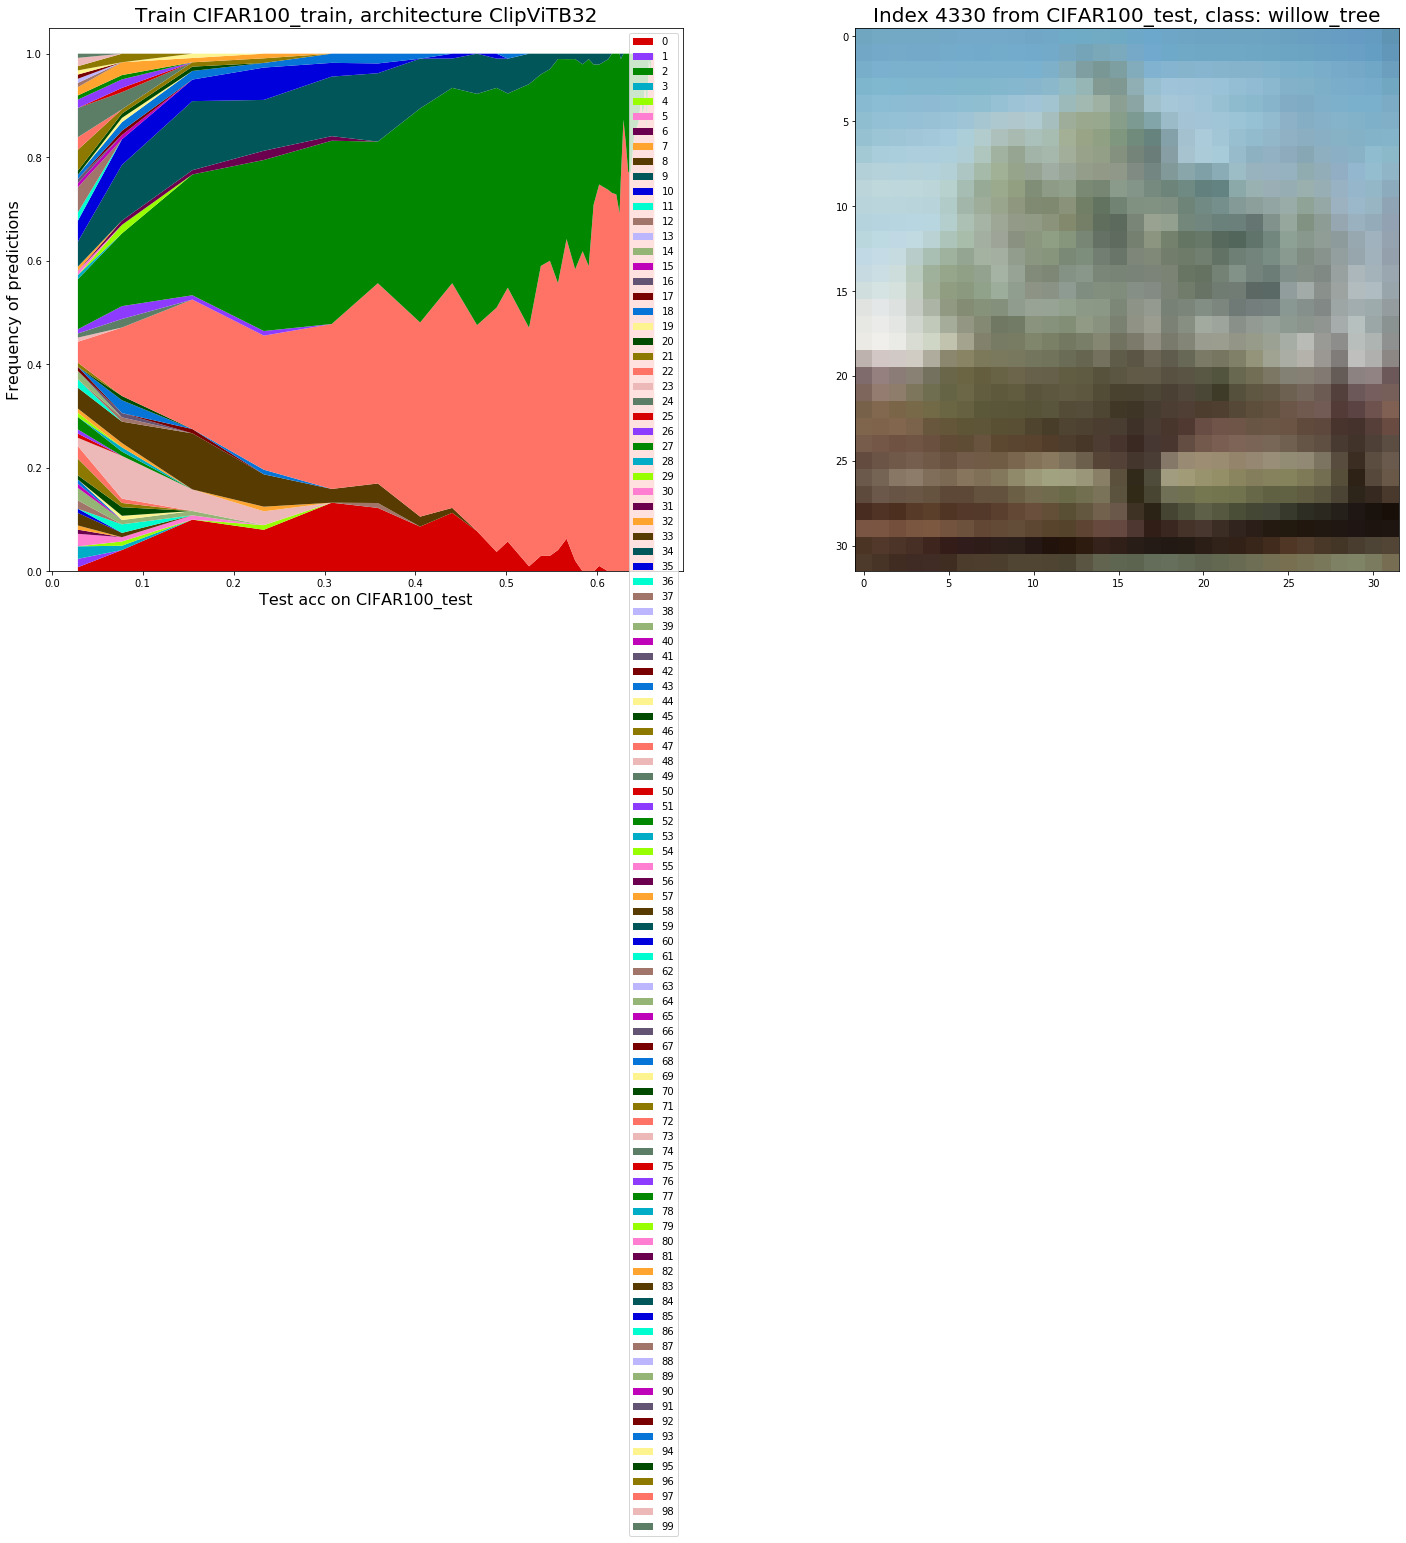

index 8585
probs
Top 5 are [73 95 30 67 91]
Prediction is shark


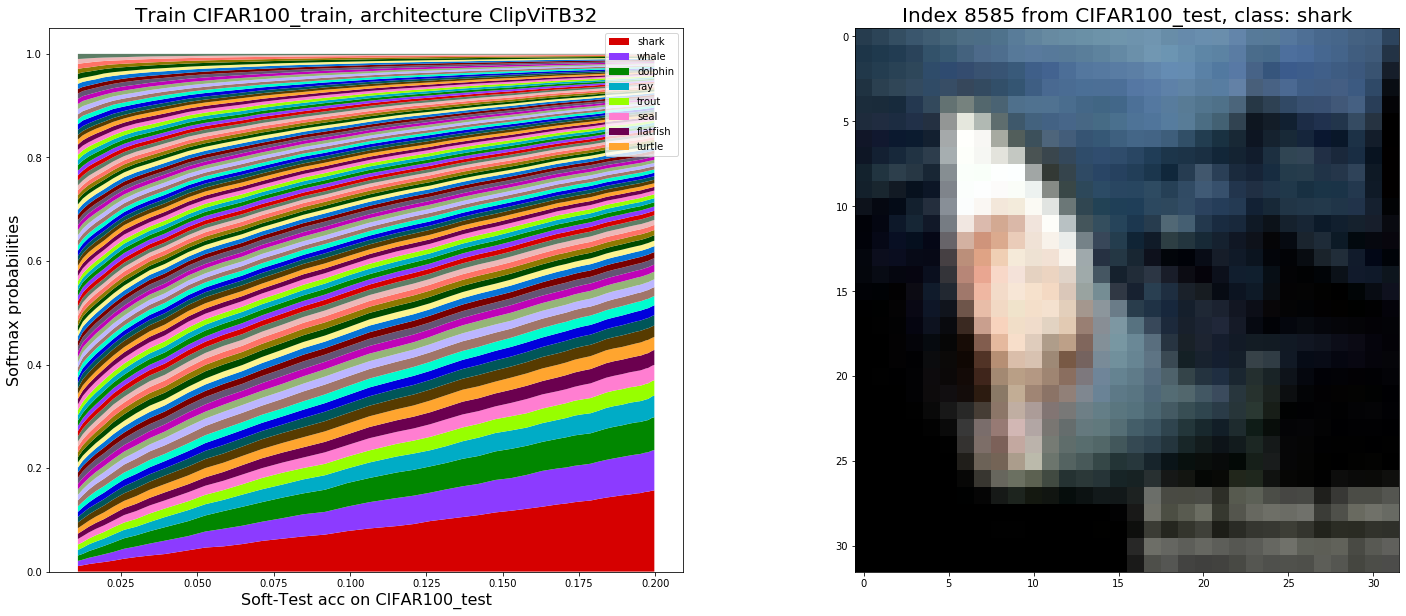

freqs


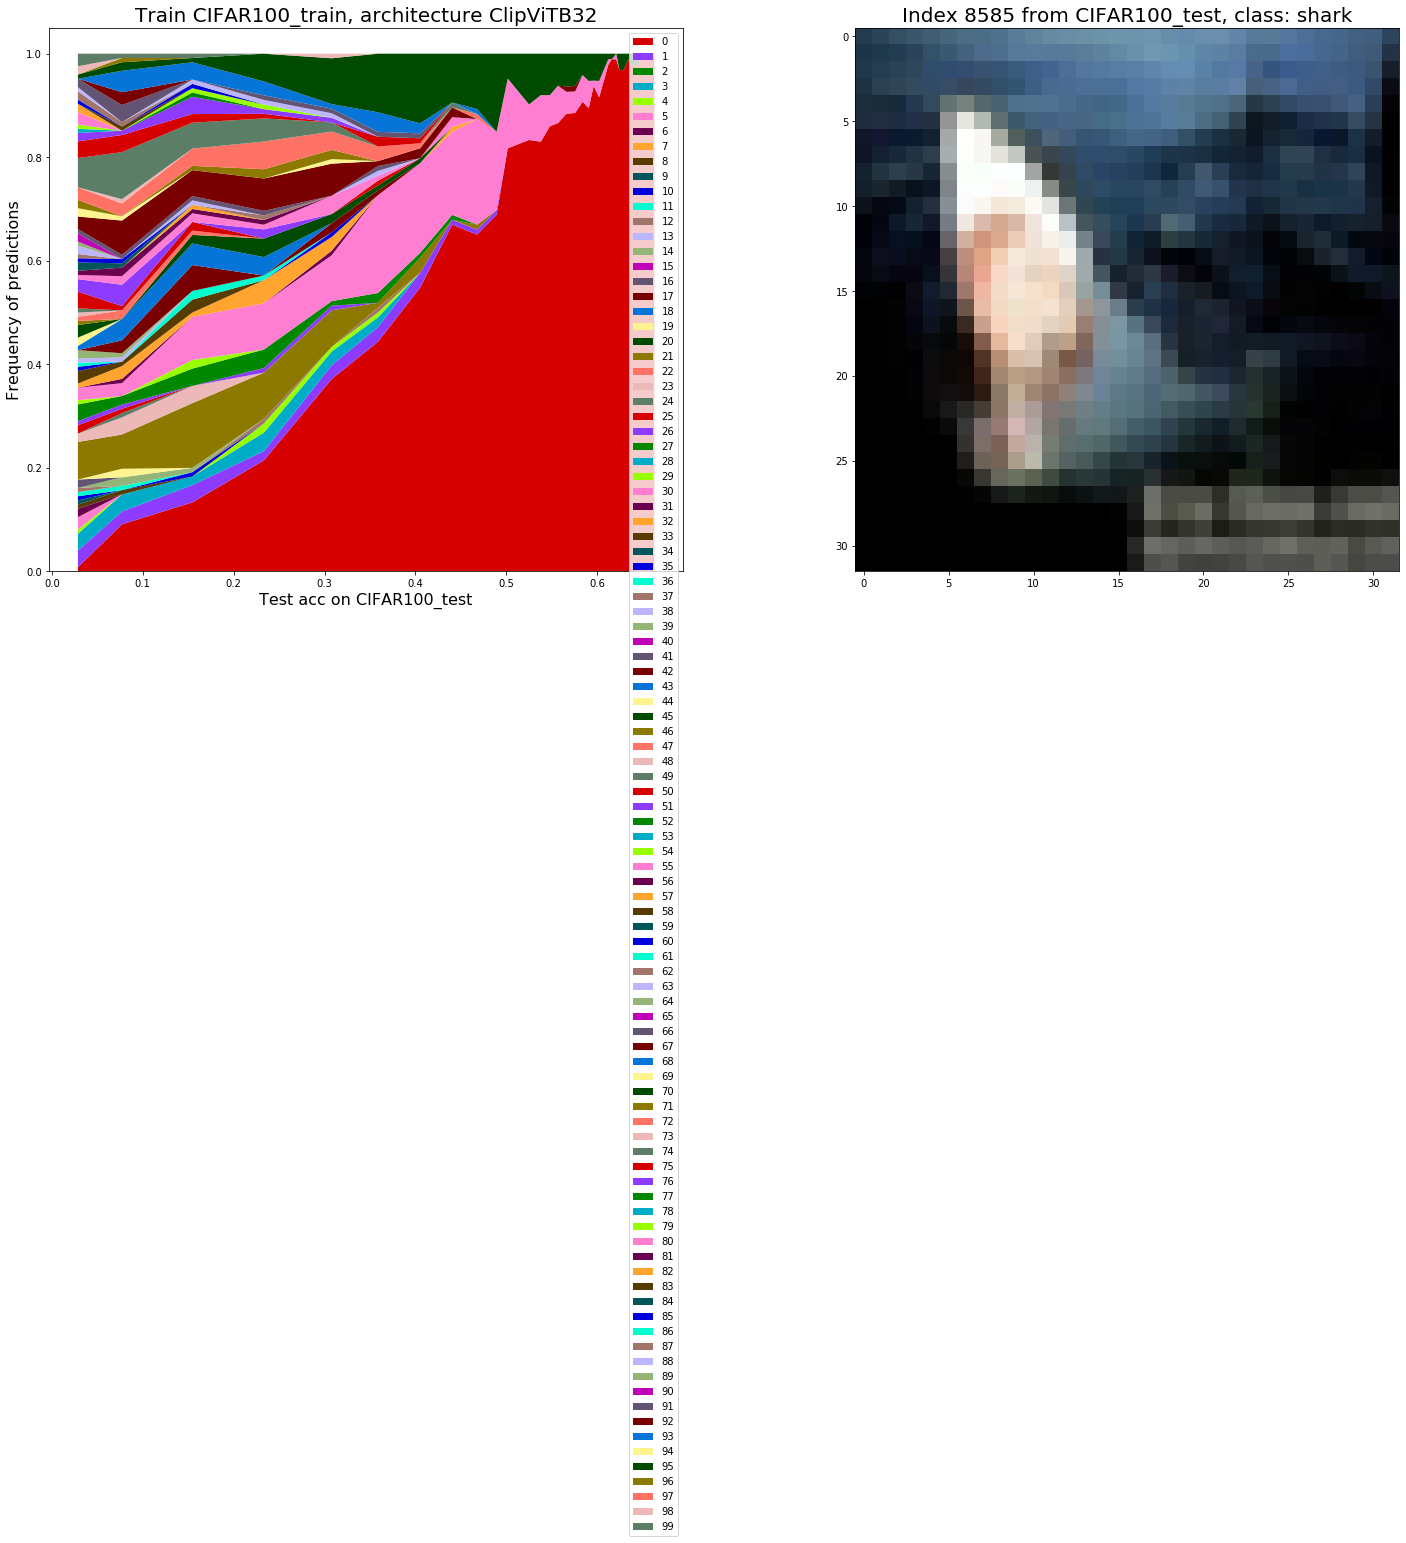

index 859
probs
Top 5 are [93  1 67 73 95]
Prediction is turtle


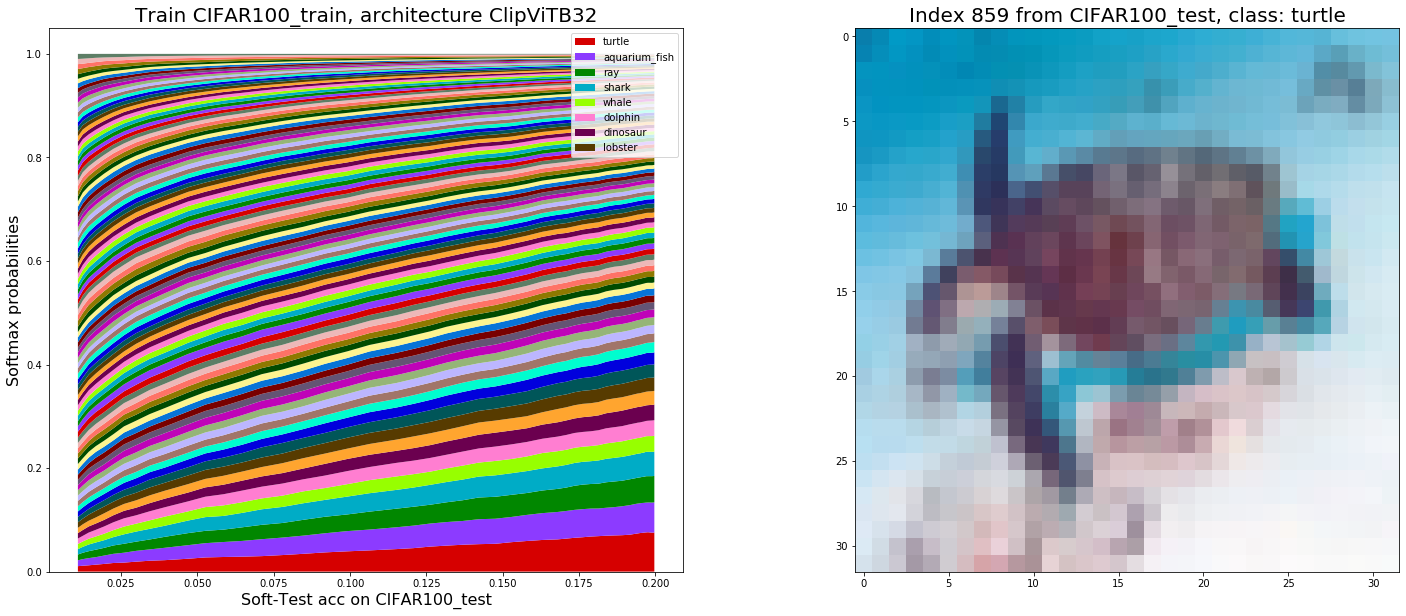

freqs


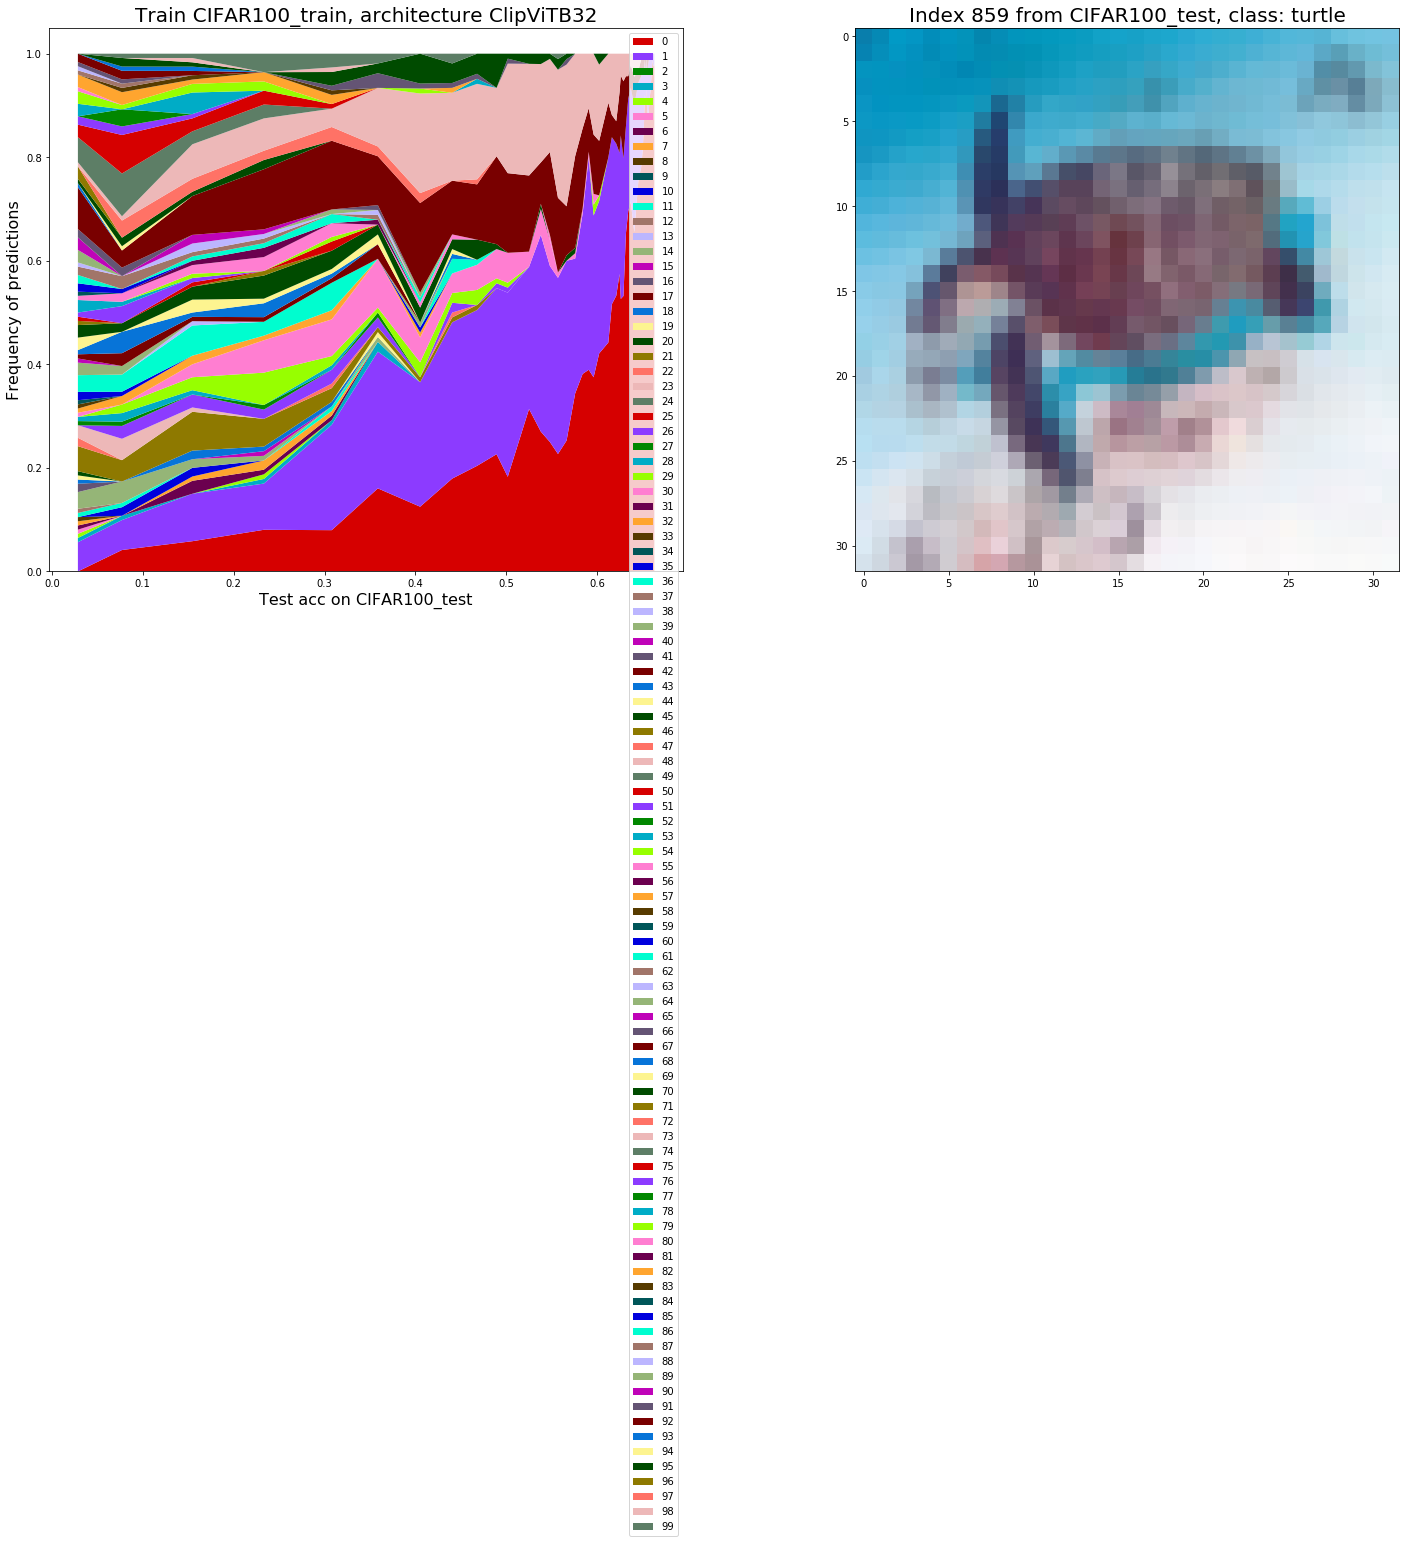

index 6973
probs
Top 5 are [52 59 47 96 56]
Prediction is oak_tree


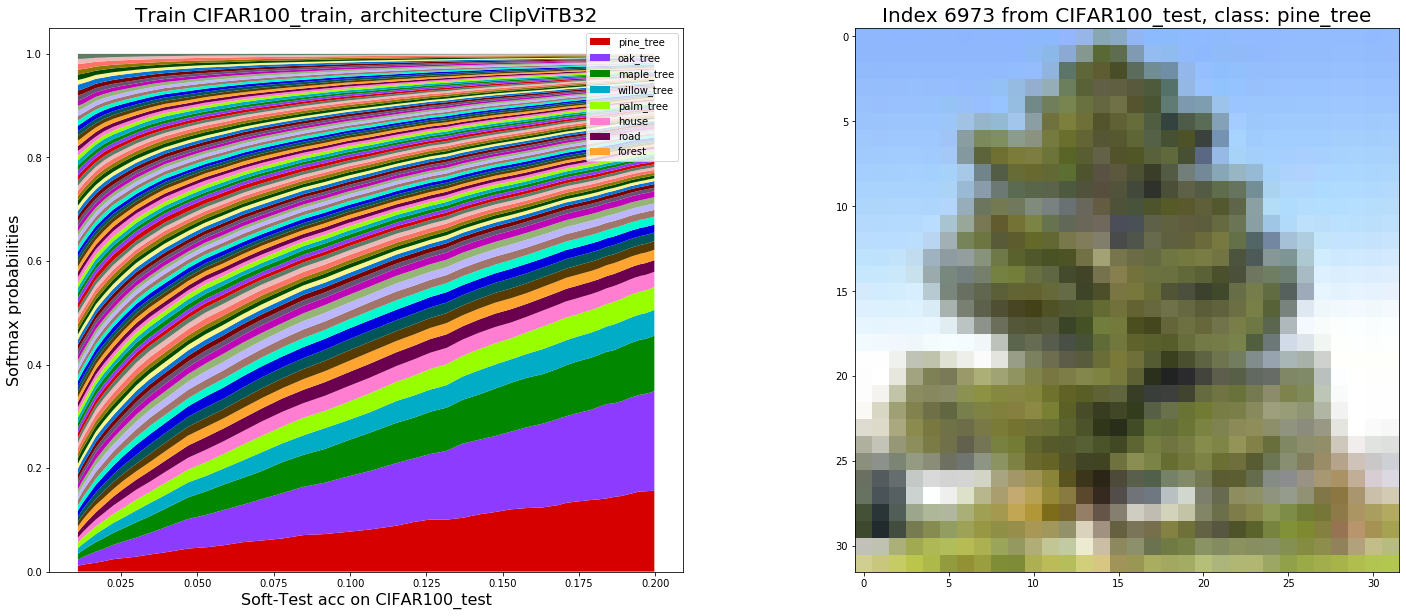

freqs


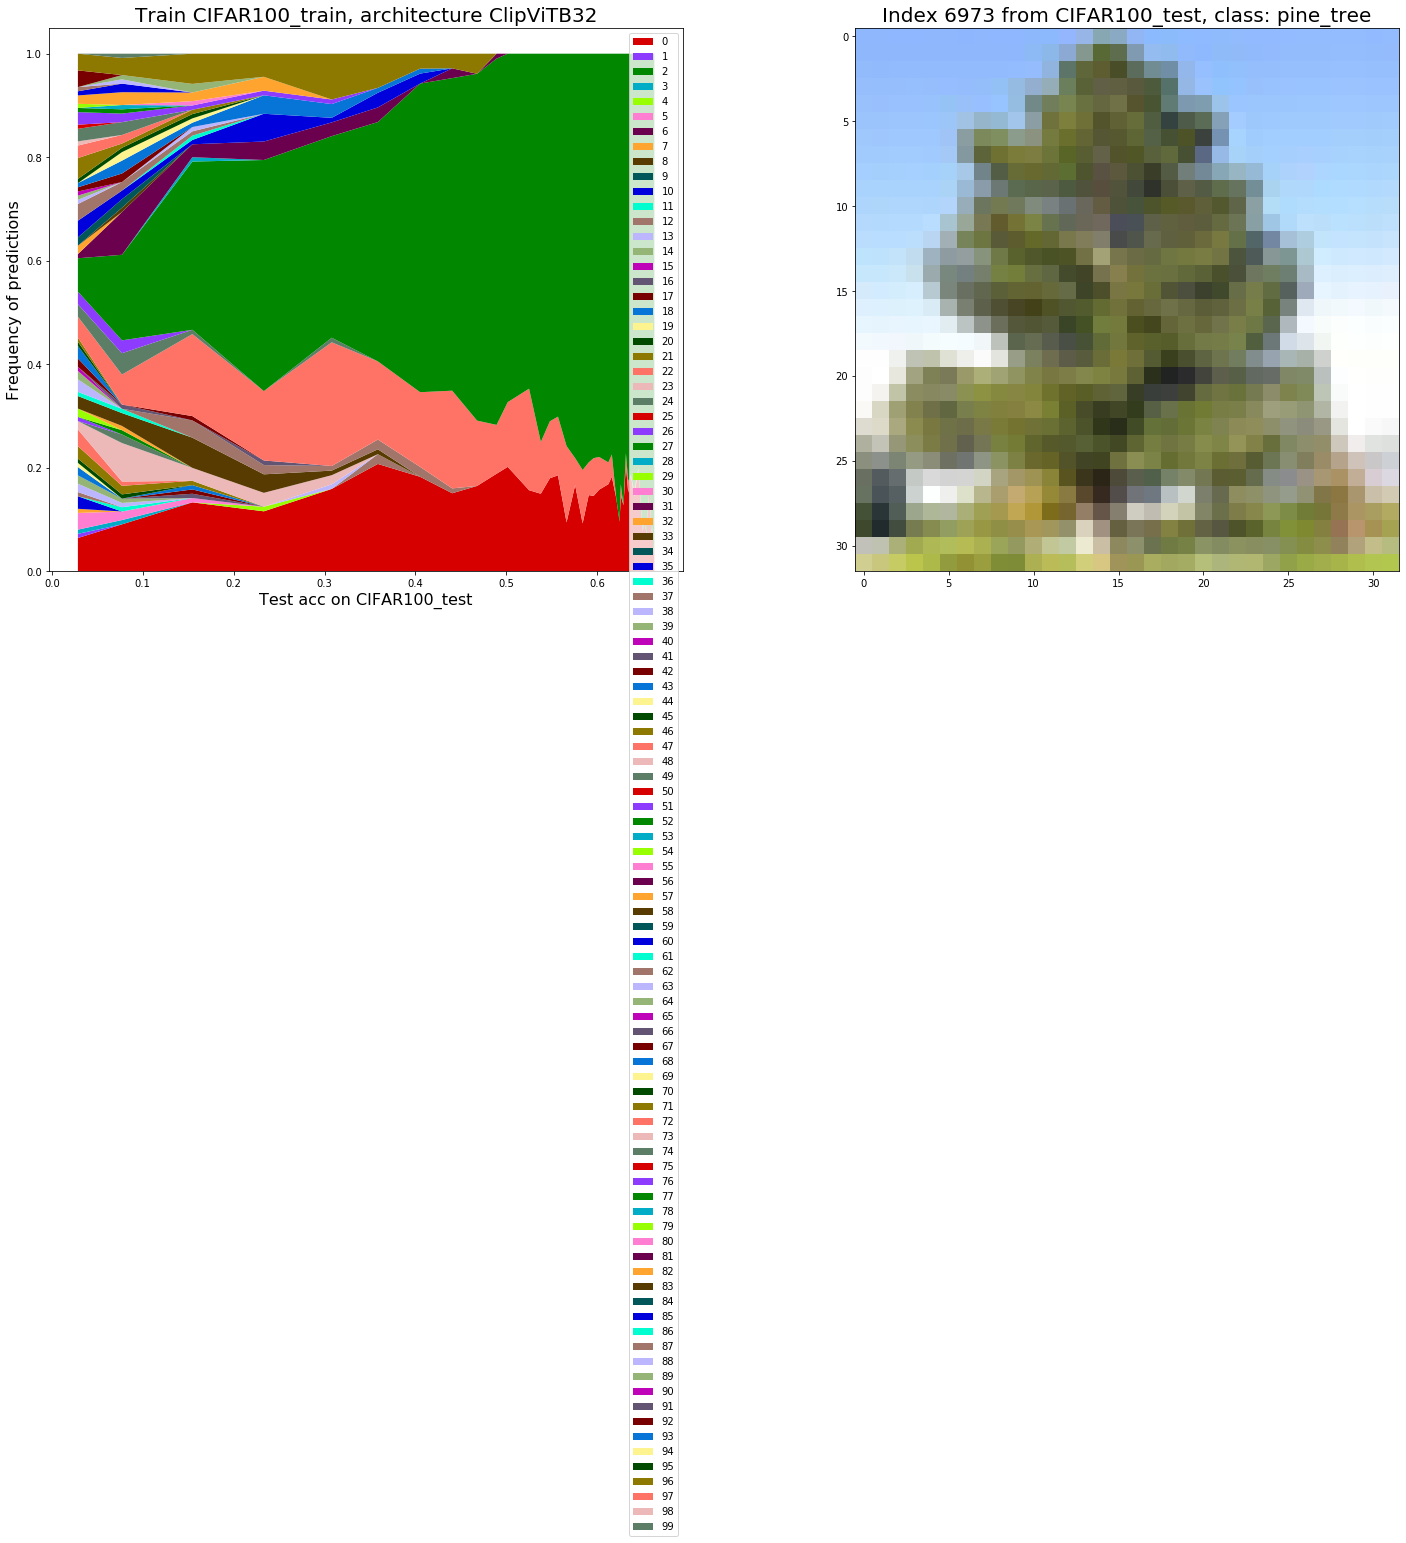

index 2014
probs
Top 5 are [77 78  7 10 50]
Prediction is snail


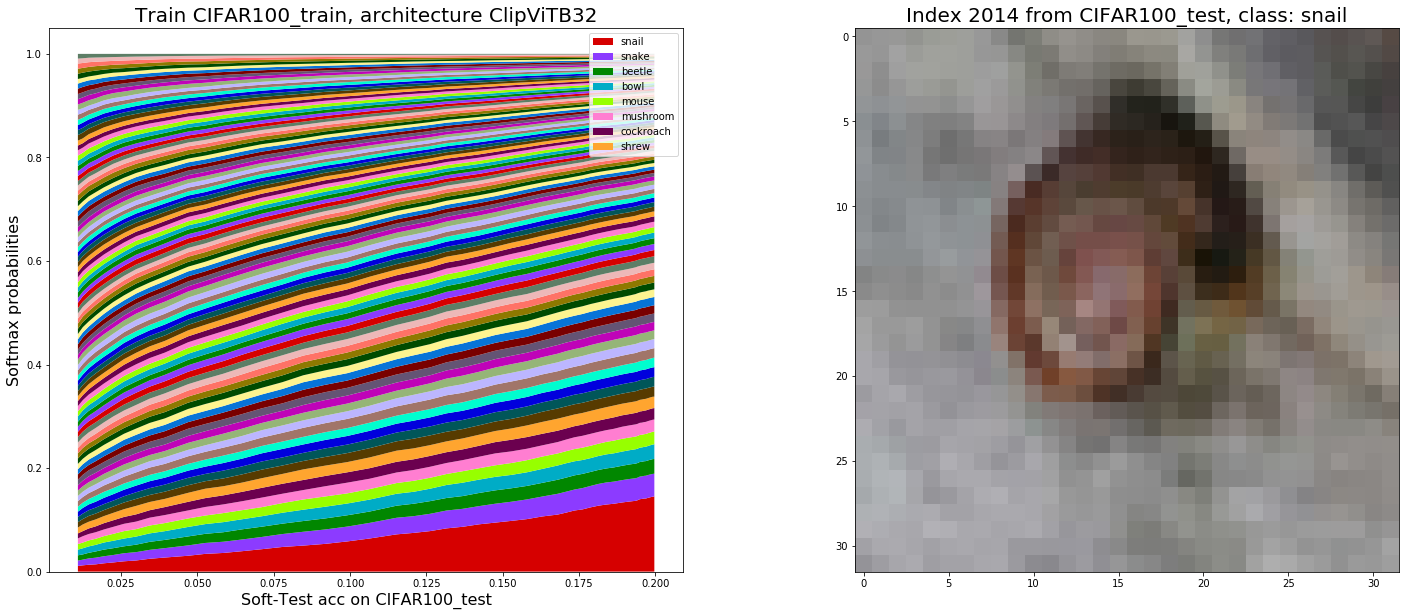

freqs


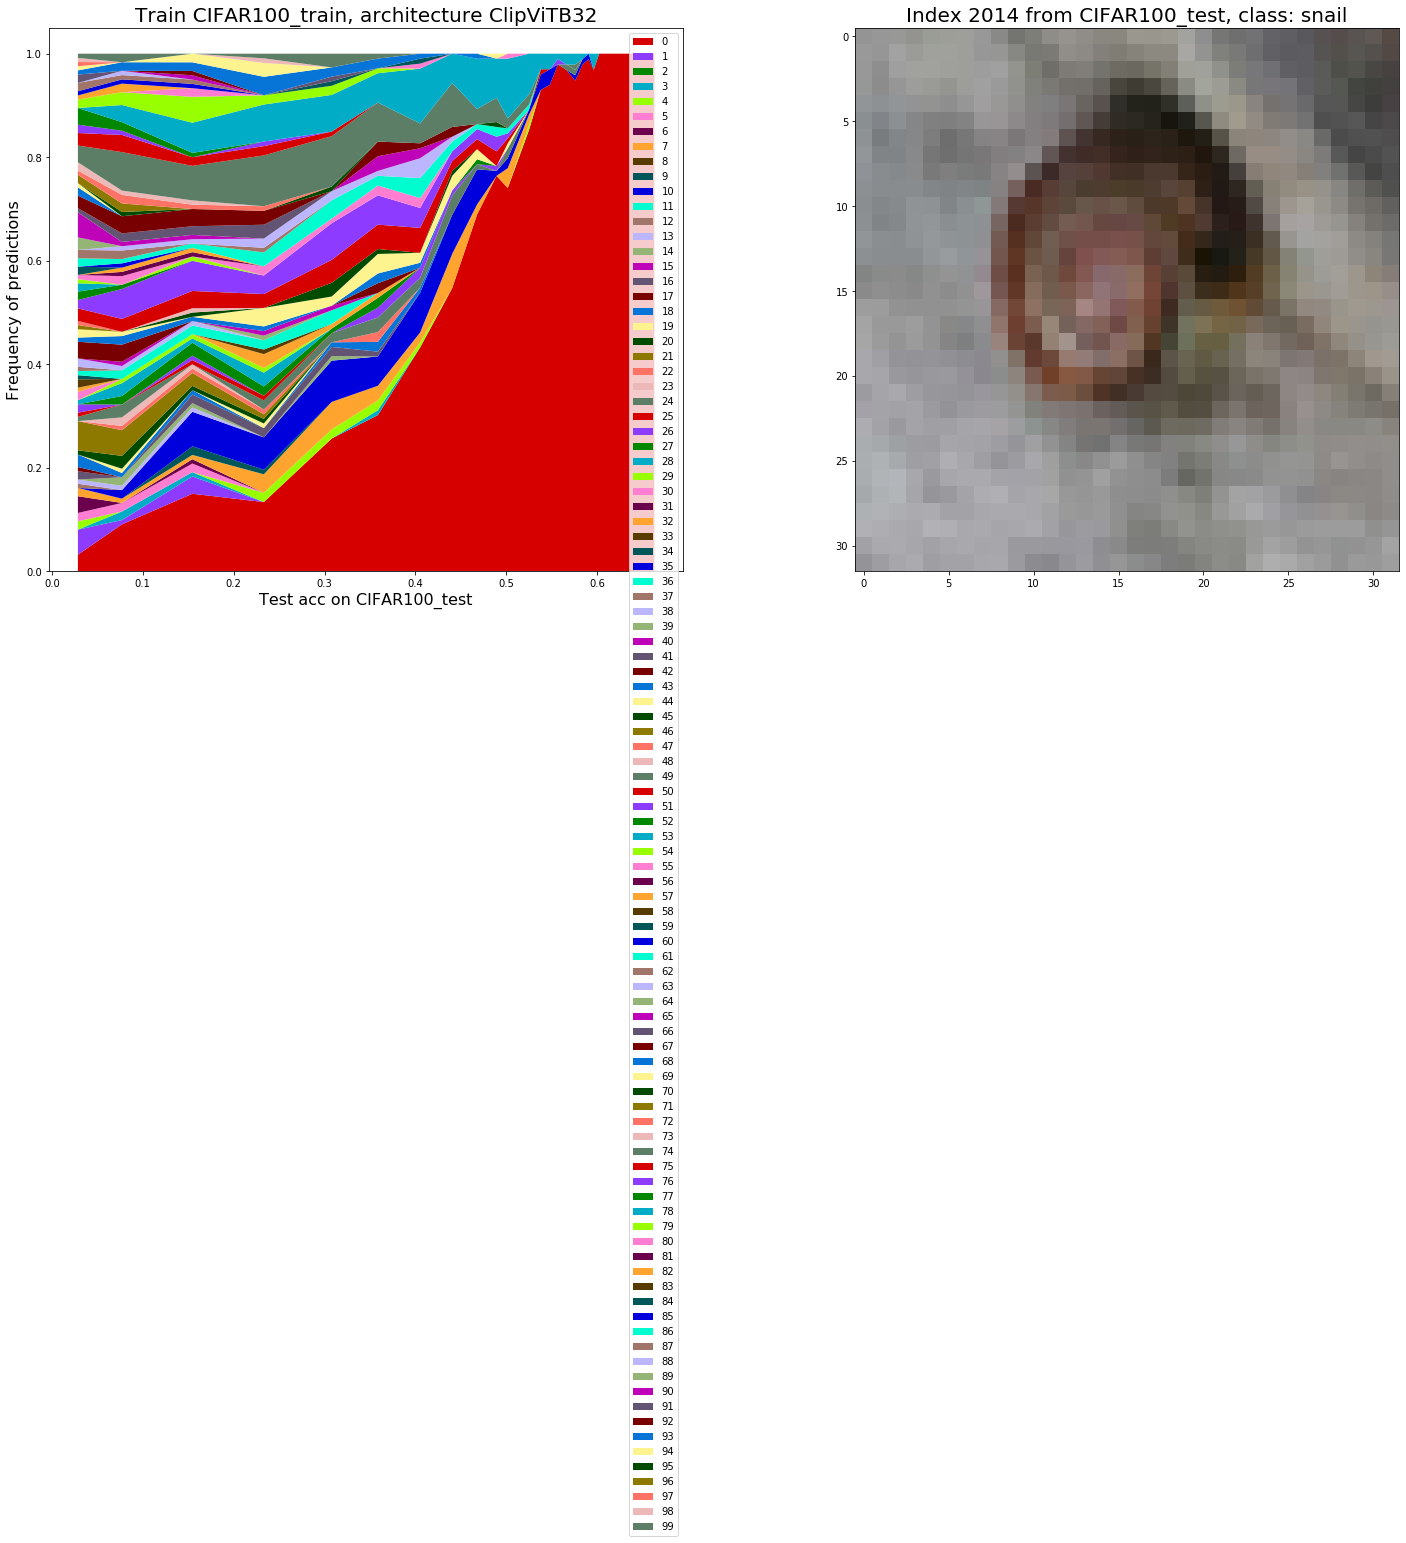

index 941
probs
Top 5 are [54 92 70 62 82]
Prediction is orchid


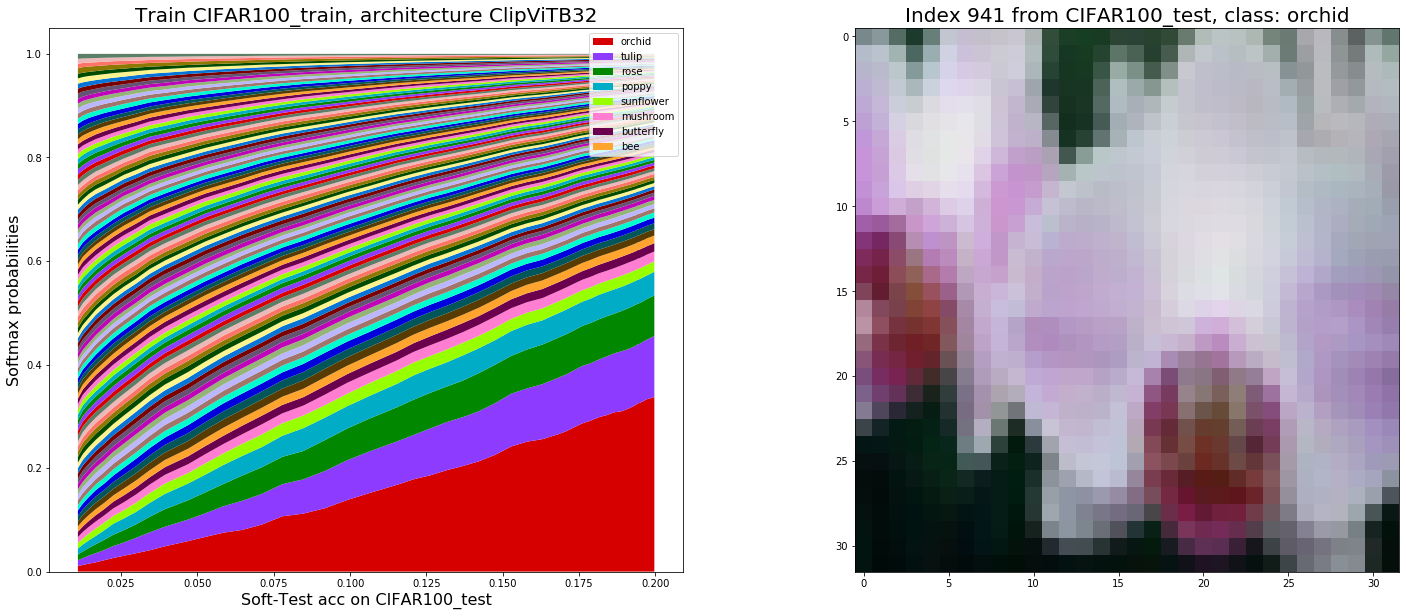

freqs


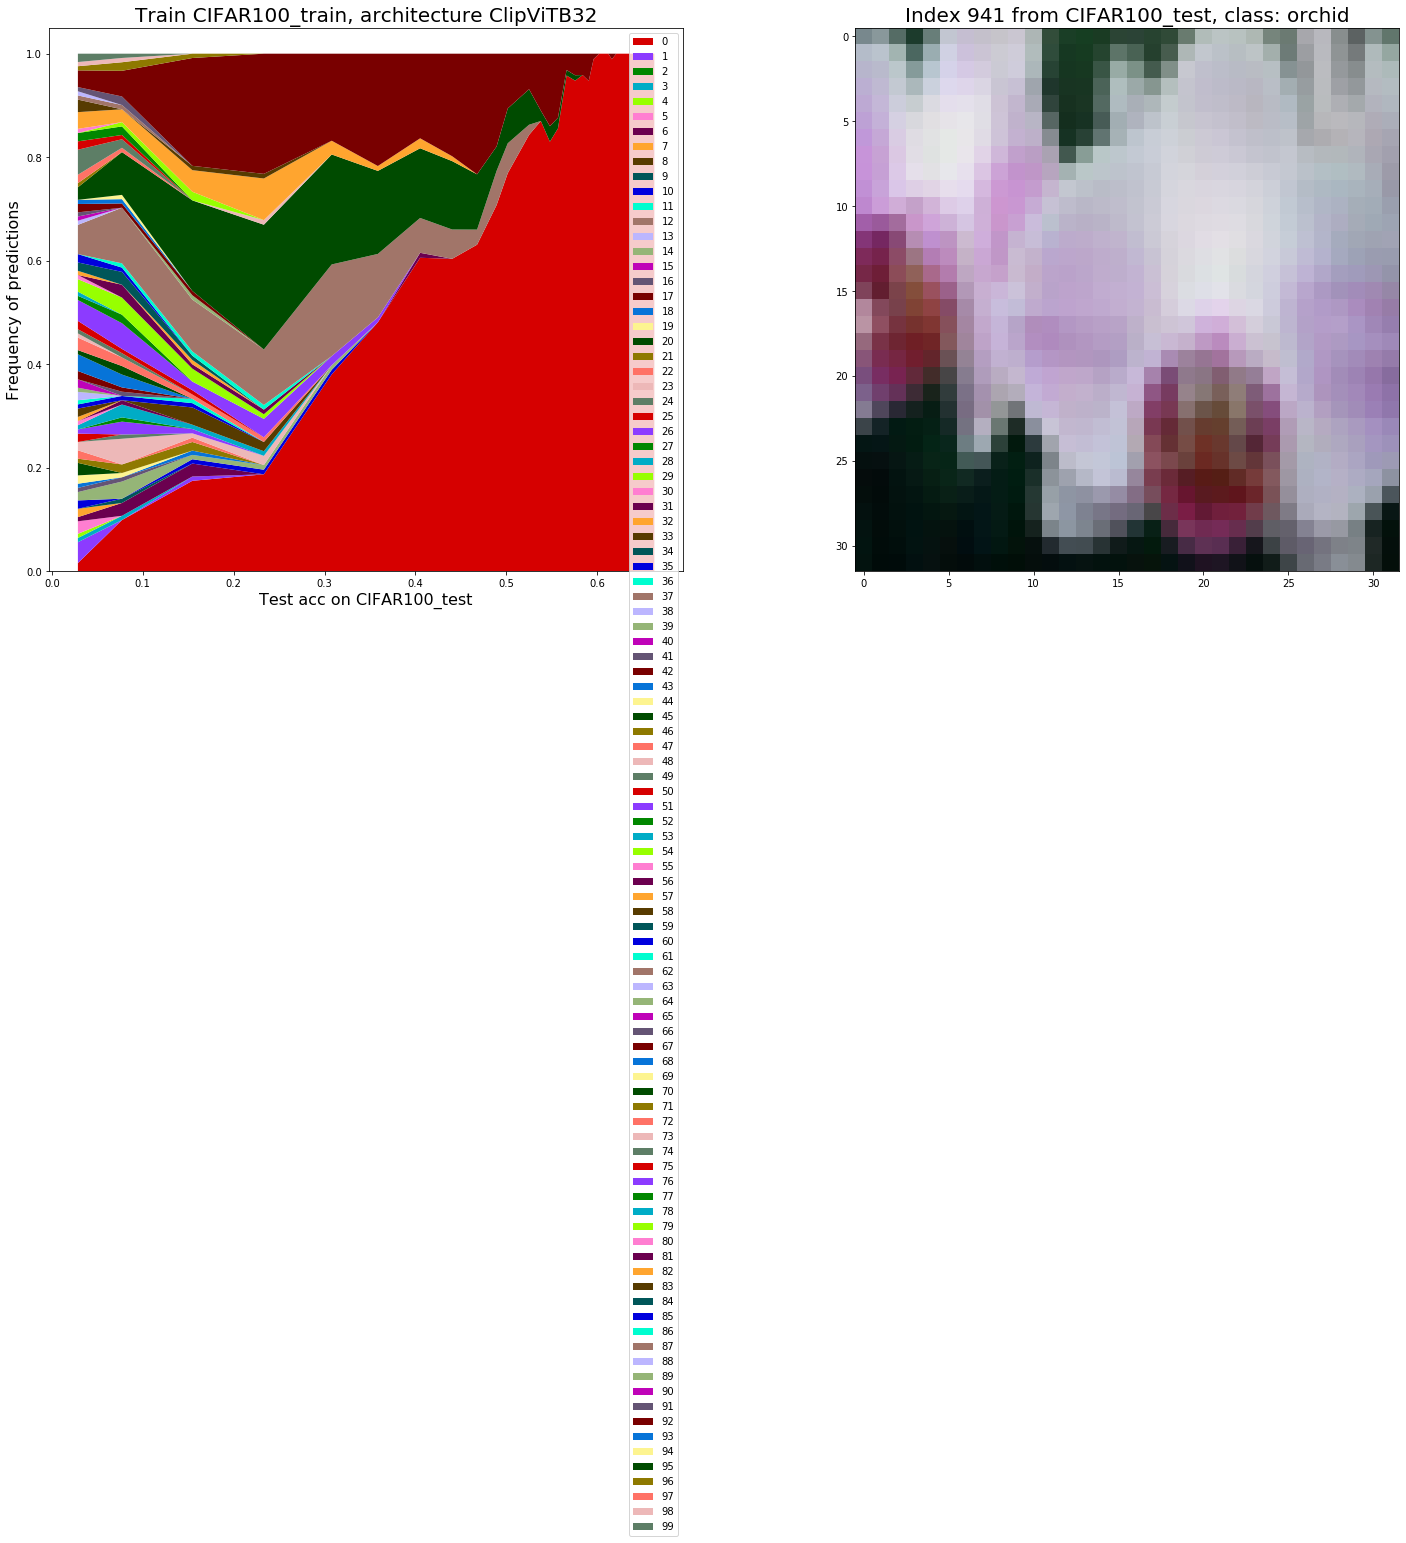

In [85]:
for idx in indices:
    stackplot(idx)